In [1]:
import os
import numpy as np
import pandas as pd
import missingno as msn
from scipy import stats
from scipy.stats import norm

pd.options.mode.chained_assignment = None

In [2]:
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
sns.set()
style.use('fivethirtyeight')

In [3]:
from sklearn import metrics
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [4]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [6]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
data.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [8]:
data.shape

(215, 15)

In [9]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [13]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [14]:
data.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [15]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
                mode = "number",
                value = data.shape[0],
                number={'font':{'color': '#7b68ee', 'size':100}},
                delta = {"reference": 600},
                title = {"text": "Rows 🗒 <br><span style="
                                 "'font-size:0.7em;color:gray'>in the data</span>"},
                domain = {'y': [0.7, 1], 'x': [0, 0.5]}))

fig.add_trace(go.Indicator(
                mode = "number",
                value = data.shape[1],
                number={'font':{'color': '#7b68ee', 'size':100}},
                delta = {"reference": 600, "valueformat": ".0f"},
                title = {"text": "Columns 🏛 <br><span style="
                                 "'font-size:0.7em;color:gray'>in the data</span>"},
                domain = {'y': [0, 0.3], 'x': [0.5, 1]}))
fig.show()

In [16]:
data.status.unique()

array(['Placed', 'Not Placed'], dtype=object)

In [17]:
data.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [18]:
hfont = {'fontname':'serif', 'weight': 'bold'}
two_colors = ['#dd38ff', '#5727ed']
five_colors = ['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE']

In [19]:
mis_val_colors = []

for col in data.columns:
    if data[col].isna().sum() != 0:
        mis_val_colors.append('#fe1969')
    else:
        mis_val_colors.append('gray')

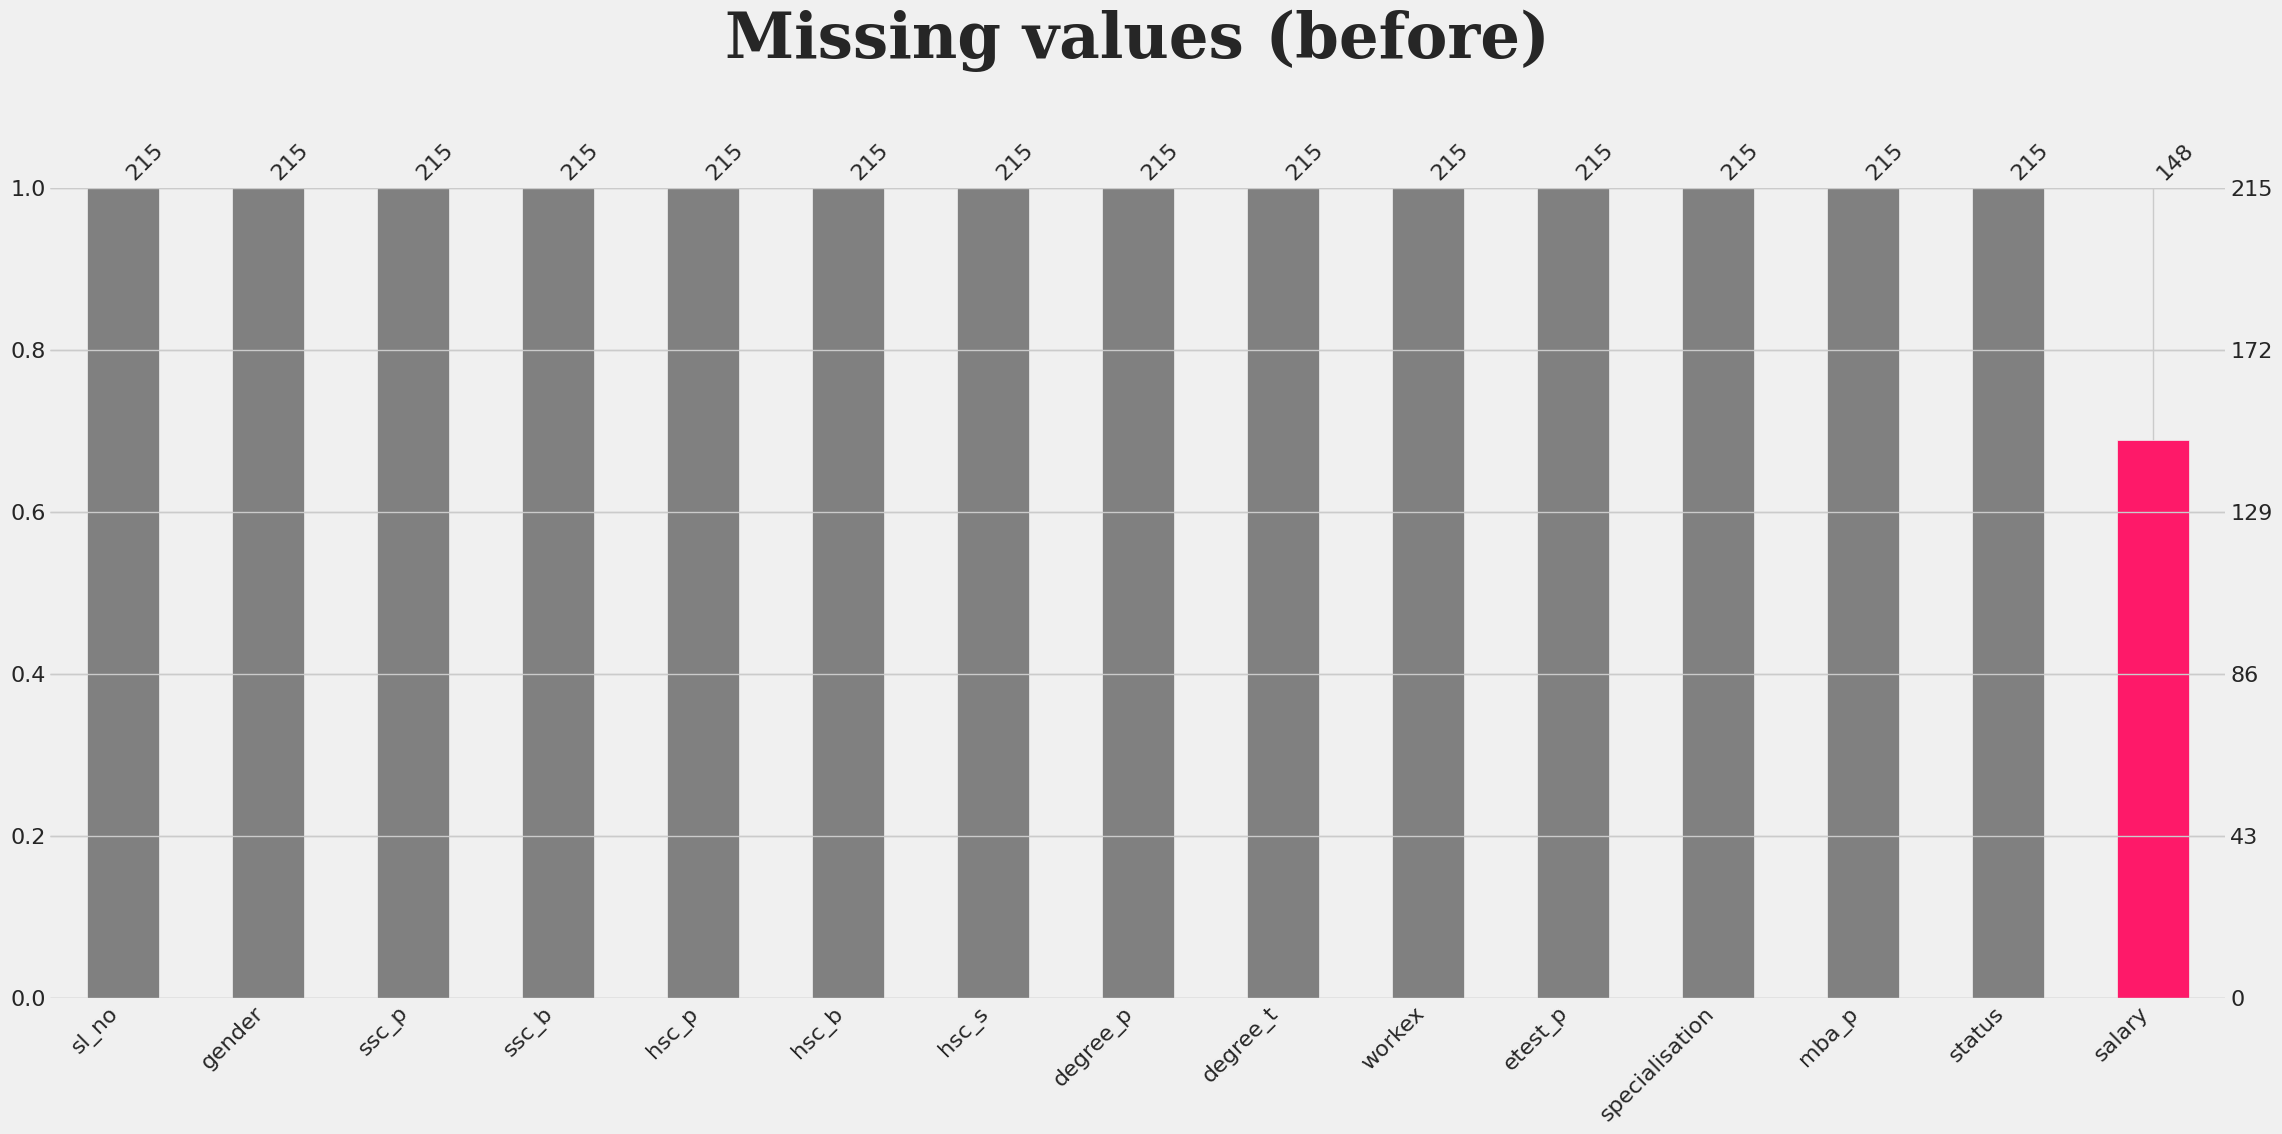

In [20]:
msn.bar(data, color=mis_val_colors)
plt.title('Missing values (before)', size=45, y=1.15, **hfont)
plt.show()

<ipython-input-21-13e212ba019d>:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




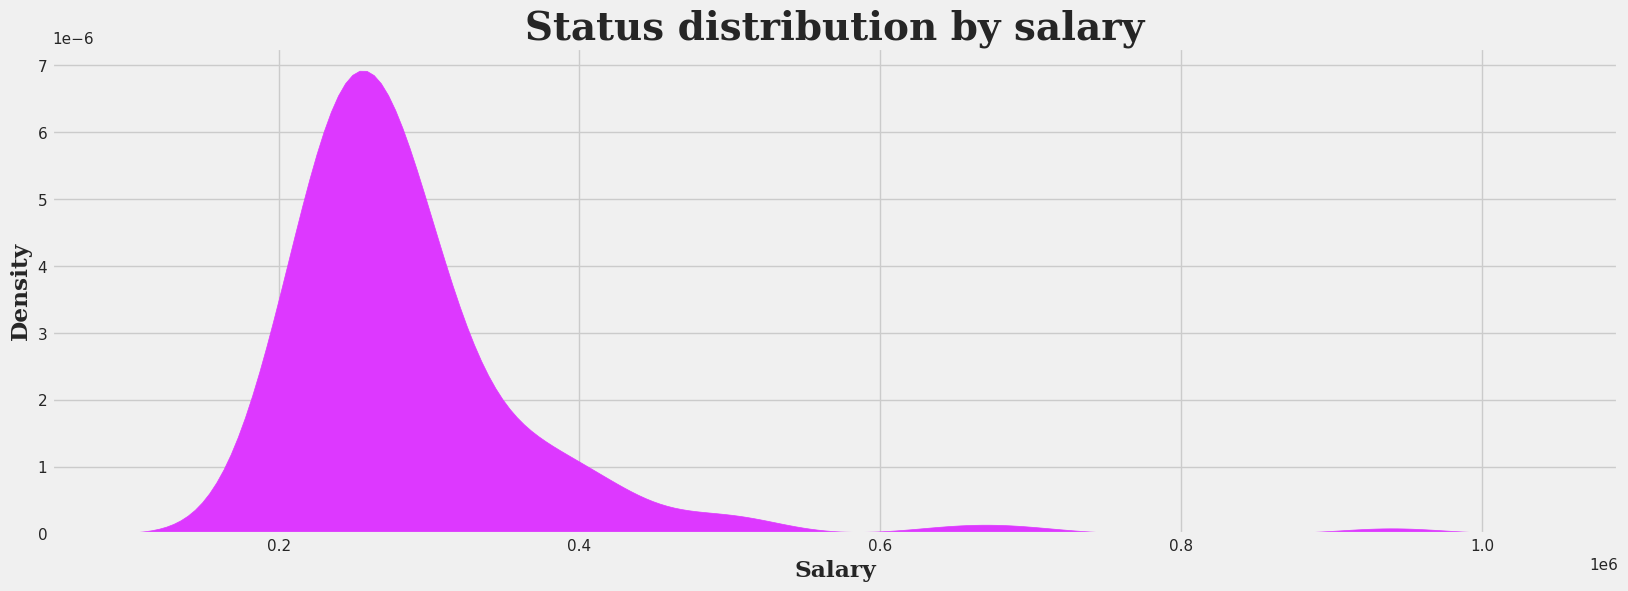

In [21]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Status distribution by salary', size=28, **hfont)

# Data without NaN values in salary column
temp_data = data.copy()
temp_data = temp_data.dropna()

# Main plots
sns.kdeplot(data=temp_data,x='salary', shade=True, ax=ax, color=two_colors[0], alpha=1)
plt.xlabel('Salary', **hfont)
plt.ylabel('Density', **hfont)
plt.show()

In [22]:
temp_data.salary.mode().iloc[0]

300000.0

In [23]:
data[['status', 'salary']][np.isnan(data.salary)]

,status,salary
3,Not Placed,NaN
5,Not Placed,NaN
6,Not Placed,NaN
9,Not Placed,NaN
12,Not Placed,NaN
...,...,...
198,Not Placed,NaN
201,Not Placed,NaN
206,Not Placed,NaN
208,Not Placed,NaN


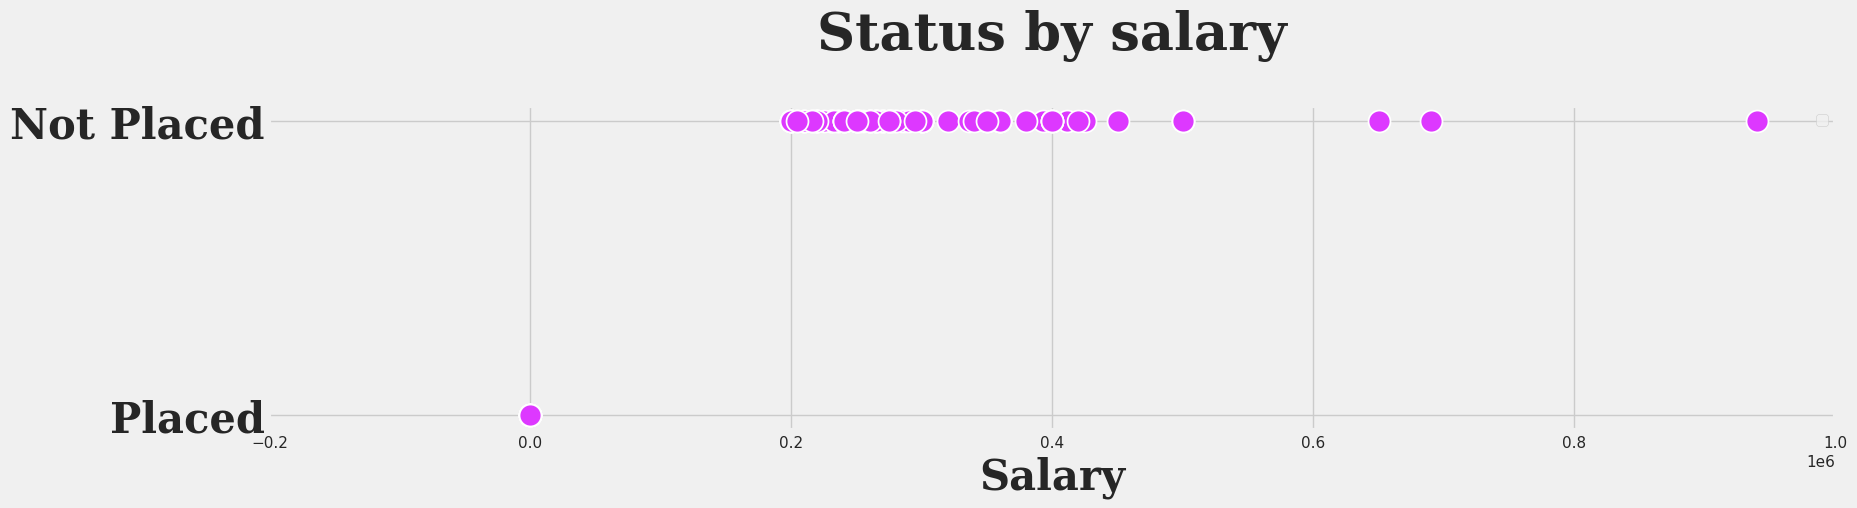

In [24]:
# Let's look at correlation b/w salary and status
data.salary.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize = (18, 4))

status_salary_plot = sns.scatterplot(x = 'salary', y = 'status', data = data,
                                     s=250, color=two_colors[0])

ax.xaxis.set_ticks(ax.get_xticks())
ax.yaxis.set_ticks(ax.get_yticks())

status_salary_plot.set_yticklabels(['Not Placed', 'Placed'], size=30, **hfont)
status_salary_plot.set(ylabel=None)

plt.title('Status by salary', size=38, y=1.15, **hfont)
plt.xlabel('Salary', size=30, **hfont)
plt.legend()
plt.show()

In [25]:
data = data.drop(columns=['salary'])

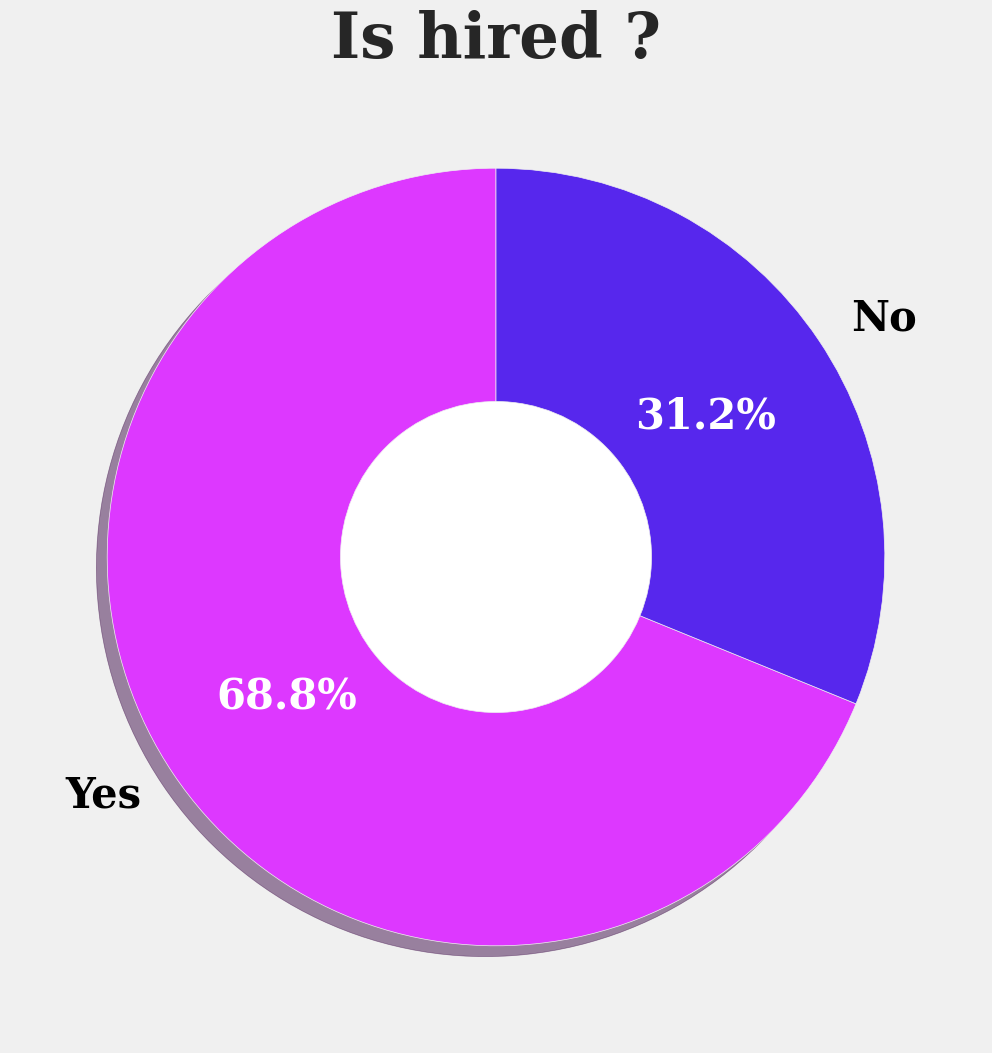

In [26]:
pie_colors = two_colors.copy()

pred_classes = data.status.value_counts()

plt.figure(figsize=(17, 12))
patches, texts, pcts = plt.pie(pred_classes,
                               labels=['Yes', 'No'],
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 30,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white', size=30)

plt.title('Is hired ?', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [27]:
data.status = data.status.map({'Placed': 1, 'Not Placed': 0})

In [28]:
data.drop(columns=['sl_no'], inplace=True)

In [29]:
data.gender = data.gender.map({'M': 1, 'F': 0})

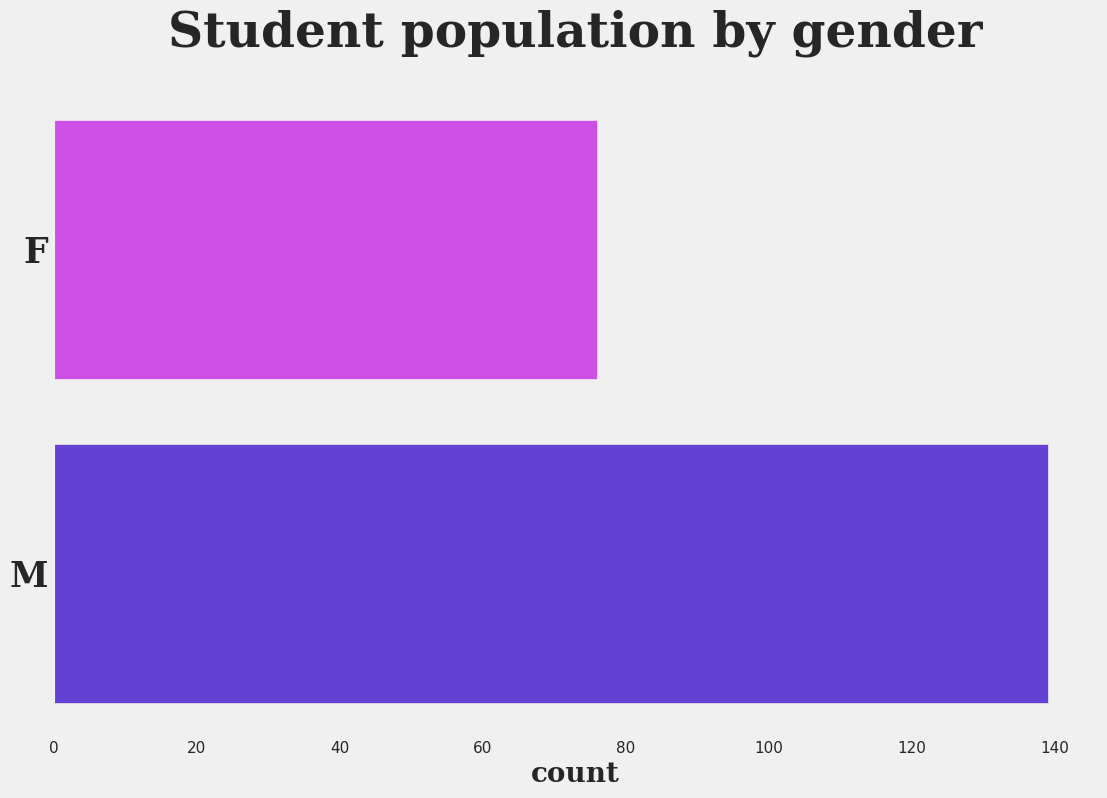

In [30]:
plt.figure(figsize=(12, 8))
gender_plot = sns.countplot(y=data.gender, palette=two_colors)
gender_plot.set_title('Student population by gender', fontsize=35, y=1.05, **hfont)
gender_plot.set(ylabel=None)
plt.grid(False)
gender_plot.set_yticklabels(['F', 'M'], size=25, **hfont)
gender_plot.set_xlabel('count', size=20, **hfont)
plt.show()

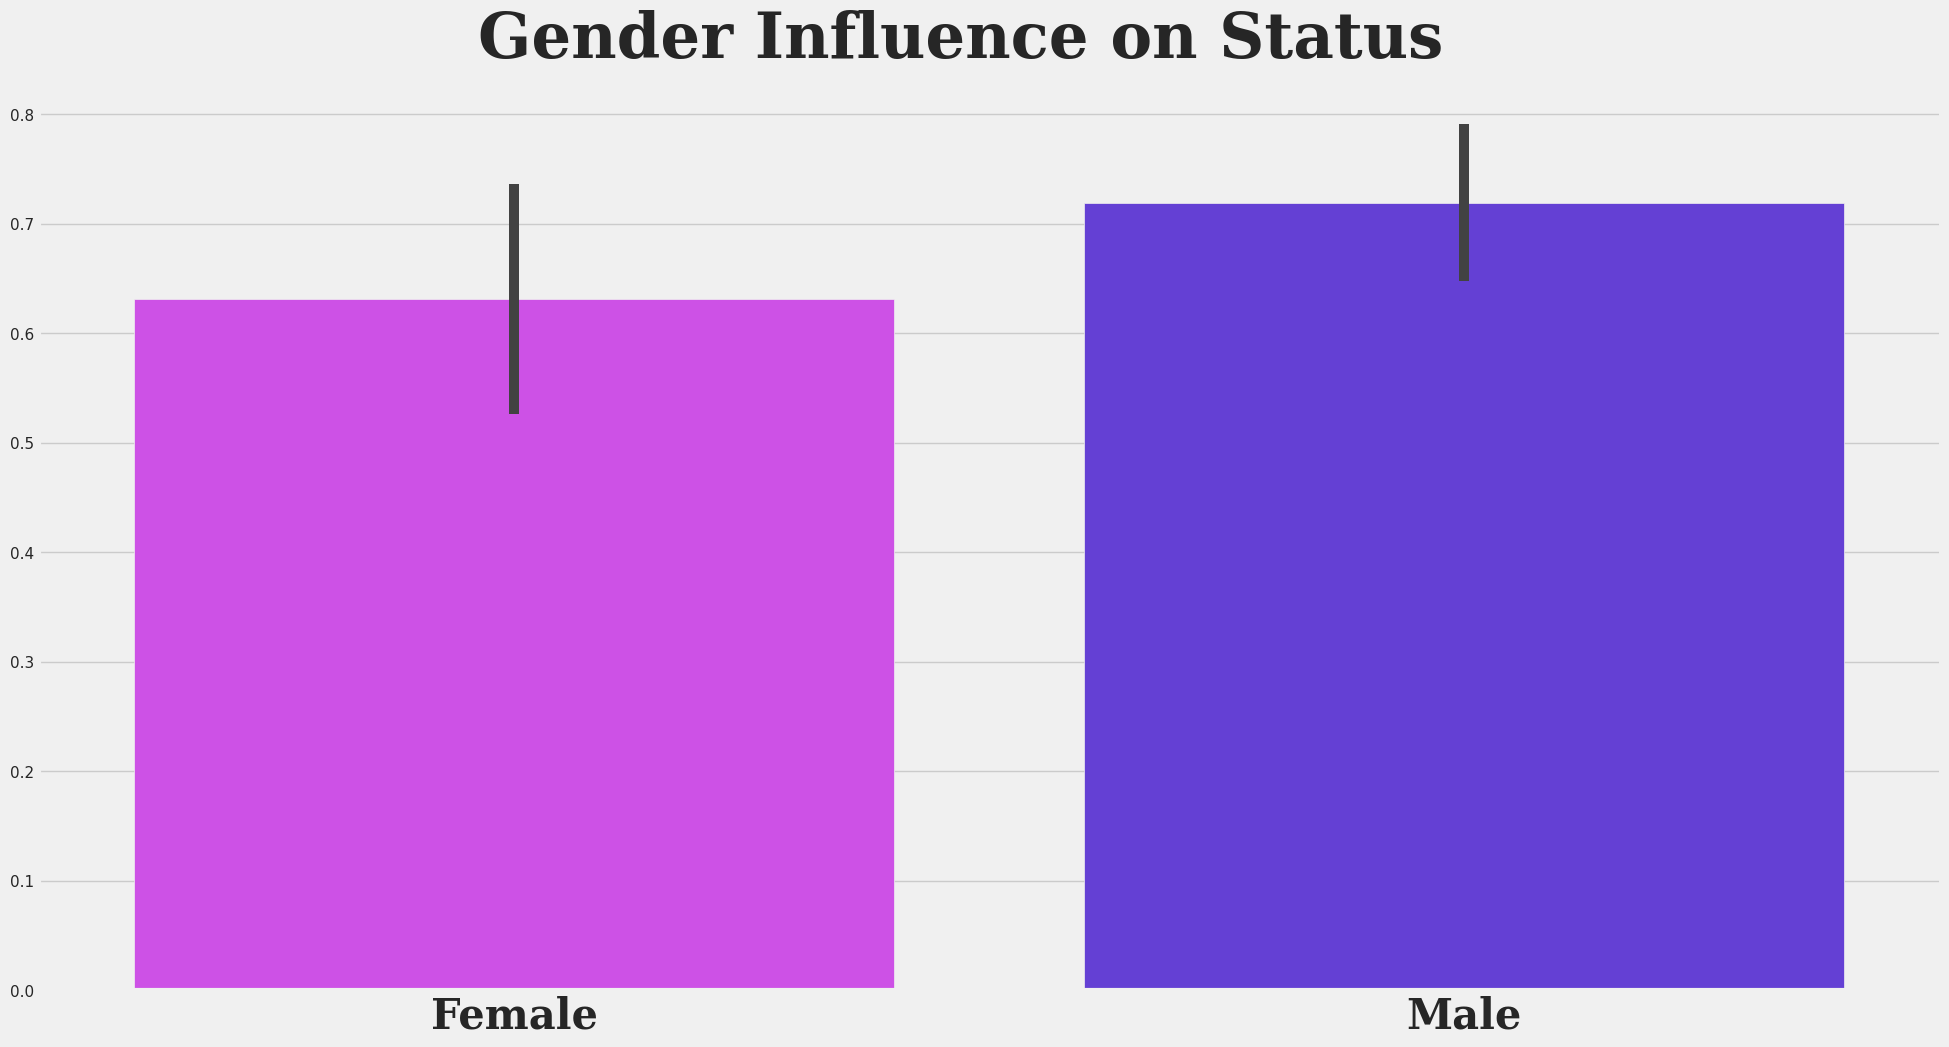

In [31]:
gender_plot = sns.catplot(y='status', x='gender', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors)
gender_plot.set_xticklabels(['Female', 'Male'], size=30, **hfont)
gender_plot.fig.suptitle('Gender Influence on Status',
                            size=45, y=1.05, **hfont)
gender_plot.set(xlabel=None, ylabel=None)
plt.show()

<ipython-input-32-2a5c5d667852>:17: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-32-2a5c5d667852>:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




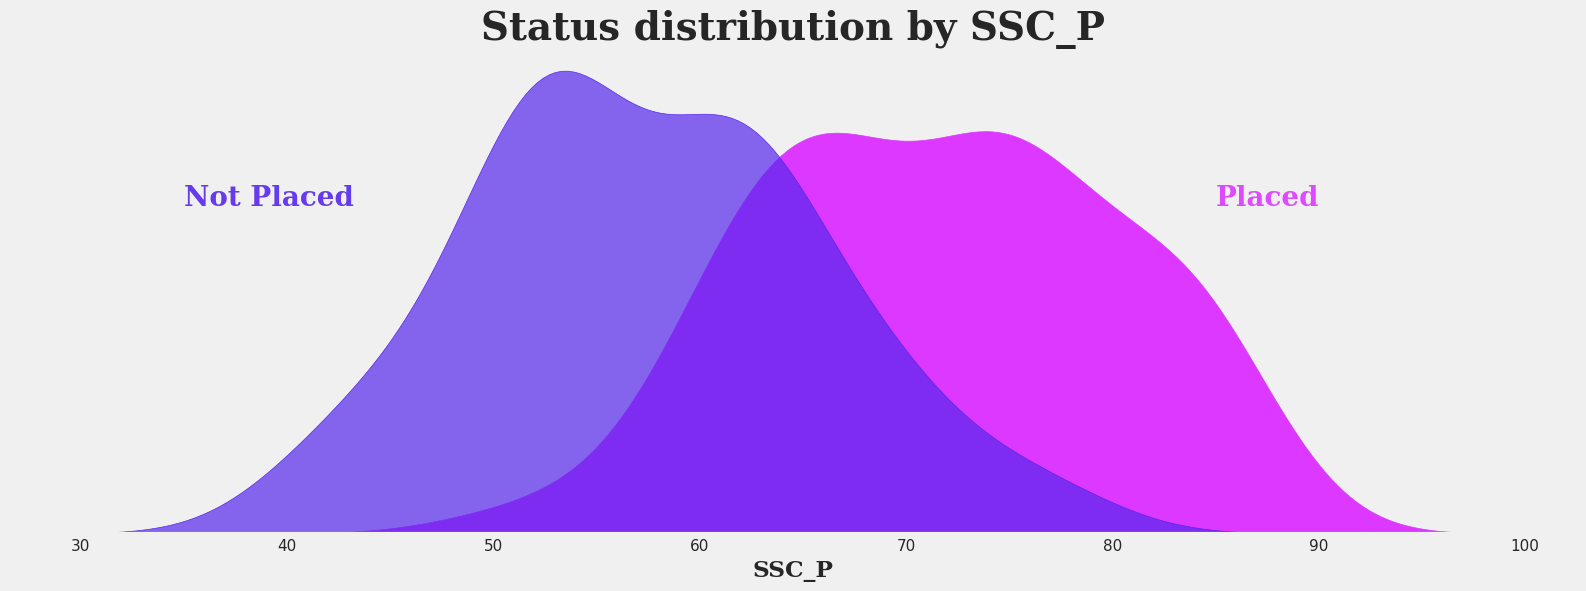

In [32]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Status distribution by SSC_P', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': two_colors[0]},
                             alpha=0.9)

ax.text(35, 0.03, 'Not Placed', {'fontproperties': 'Serif',
                                'size': '20',
                                'weight': 'bold',
                                'color': two_colors[1]}, alpha=0.9)

sns.kdeplot(data=data[data.status == 1],
            x='ssc_p', shade=True, ax=ax, color=two_colors[0], alpha=1)
sns.kdeplot(data=data[data.status == 0],
            x='ssc_p', shade=True, ax=ax, color=two_colors[1], alpha=0.7)
plt.xlabel('SSC_P', **hfont)
plt.show()

In [33]:
placed_group = data[data.status == 1]['ssc_p']
not_placed_group = data[data.status == 0]['ssc_p']

t_test = stats.ttest_ind(placed_group, not_placed_group)
u_test = stats.mannwhitneyu(placed_group, not_placed_group)

In [34]:
print(f'Results of T-test                :   {t_test.pvalue}')
print(f'Results of U-test (Mann-whitneyu):   {u_test.pvalue}')

Results of T-test                :   4.115201043884403e-23
Results of U-test (Mann-whitneyu):   1.692865445594402e-18


In [35]:
data.ssc_b.unique()

array(['Others', 'Central'], dtype=object)

In [36]:
data.ssc_b.value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [37]:
data.ssc_b = data.ssc_b.map({'Central': 1, 'Others': 0})

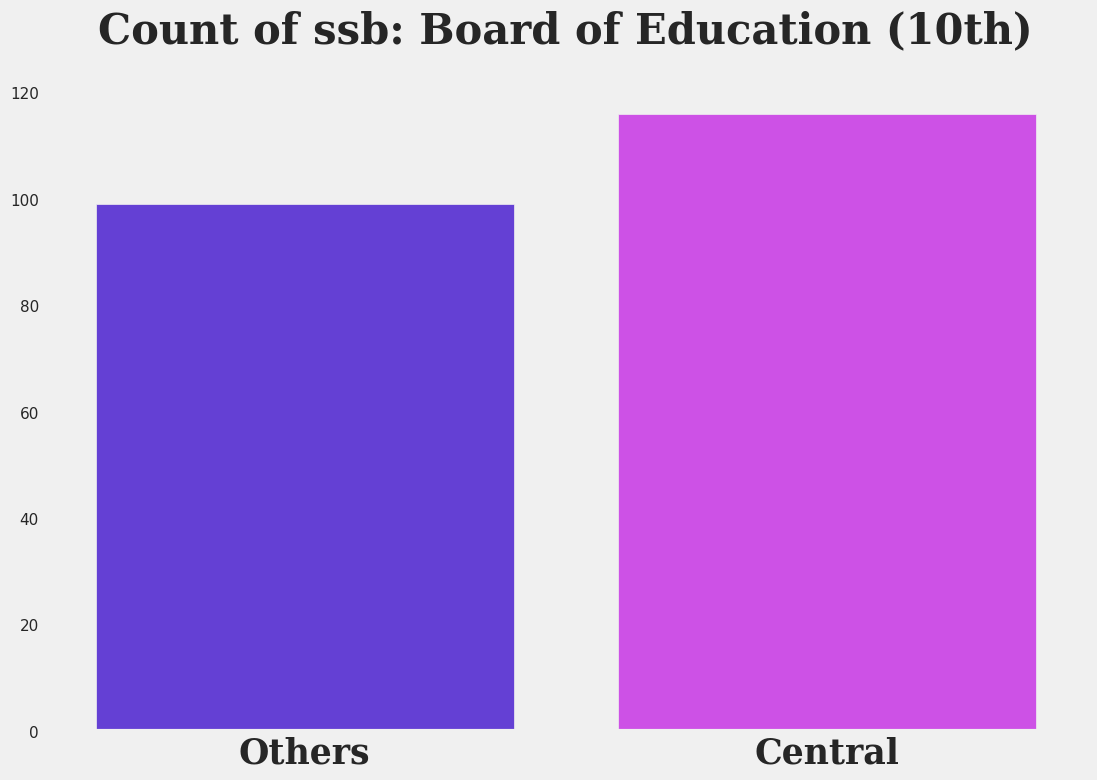

In [38]:
plt.figure(figsize=(12, 8))
ssc_b_plot = sns.countplot(x=data.ssc_b,
                            palette=two_colors[::-1])
ssc_b_plot.set_title('Count of ssb: Board of Education (10th)',
                      fontsize=30, y=1.05, **hfont)
ssc_b_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
ssc_b_plot.set_xticklabels(['Others', 'Central'], size=25, **hfont)
plt.show()

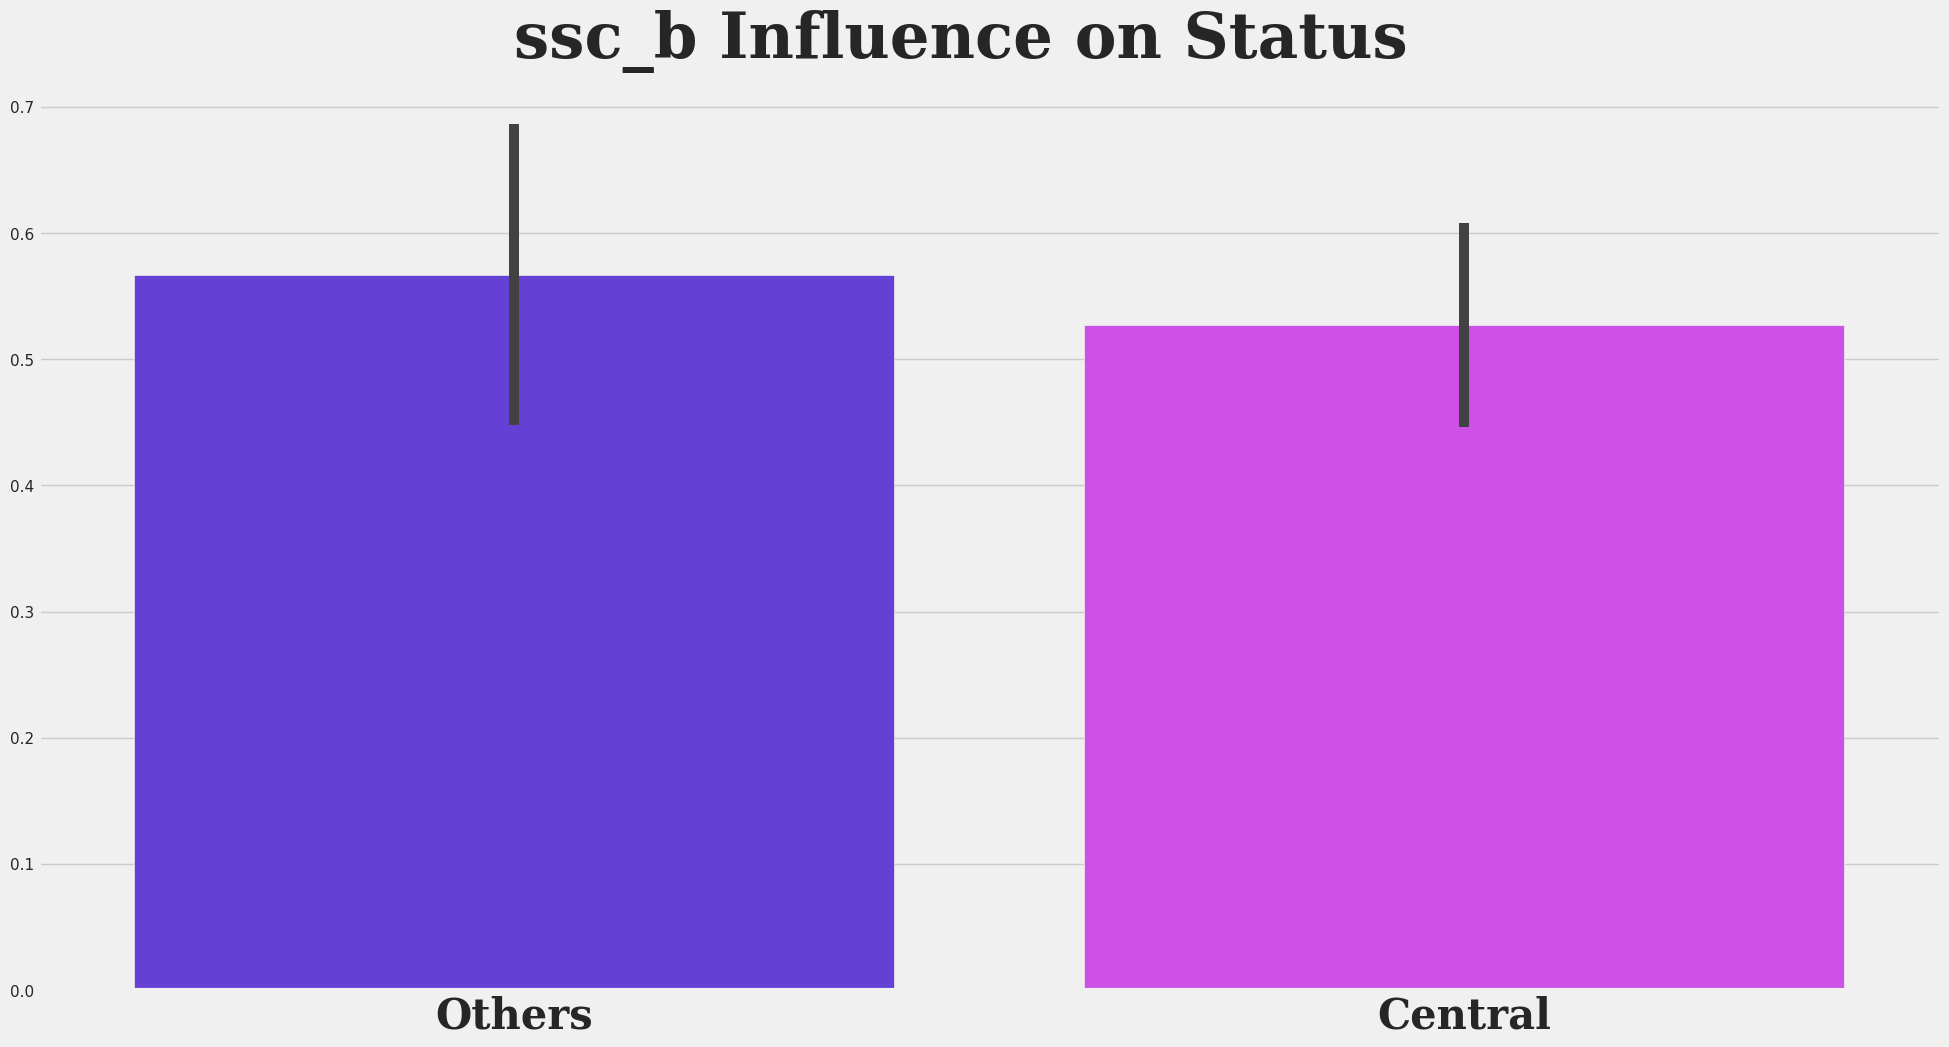

In [39]:
ssc_b_plot = sns.catplot(x='status', y='ssc_b', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
ssc_b_plot.set_xticklabels(['Others', 'Central'], size=30, **hfont)
ssc_b_plot.fig.suptitle('ssc_b Influence on Status',
                            size=45, y=1.05, **hfont)
ssc_b_plot.set(xlabel=None, ylabel=None)
plt.show()

<ipython-input-40-f18613da175e>:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-40-f18613da175e>:18: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Placed mean:       69.92655405405407
Not Placed mean:   58.3955223880597


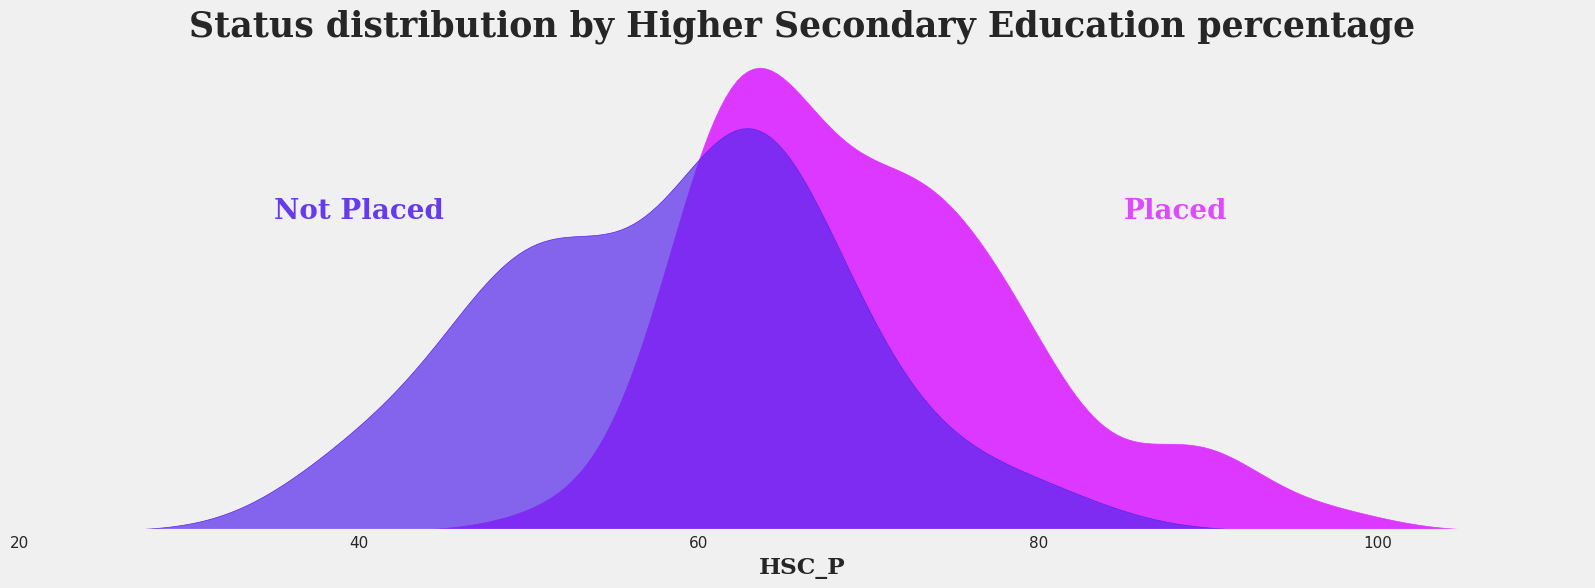

In [40]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Status distribution by Higher Secondary Education percentage', size=25, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': two_colors[0]}, alpha=0.9)

ax.text(35, 0.03, 'Not Placed', {'fontproperties': 'Serif',
                                'size': '20',
                                'weight': 'bold',
                                'color': two_colors[1]}, alpha=0.9)

sns.kdeplot(data=data[data.status == 1],
            x='hsc_p', shade=True, ax=ax, color=two_colors[0], alpha=1)
sns.kdeplot(data=data[data.status == 0],
            x='hsc_p', shade=True, ax=ax, color=two_colors[1], alpha=0.7)
plt.xlabel('HSC_P', **hfont)

print(f'Placed mean:       {data[data.status == 1]["hsc_p"].mean()}')
print(f'Not Placed mean:   {data[data.status == 0]["hsc_p"].mean()}')
plt.show()

In [41]:
from tqdm.auto import tqdm

def get_bootstrap(
    data_column_1, # numeric values for group 1
    data_column_2, # numeric values for group 2
    boot_it = 1000, # bootstrap samples
    statistic = np.mean, # the statistic
    bootstrap_conf_level = 0.95 # significance threshold 
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # get samples
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len,
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Visualization
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

  0%|          | 0/1000 [00:00<?, ?it/s]

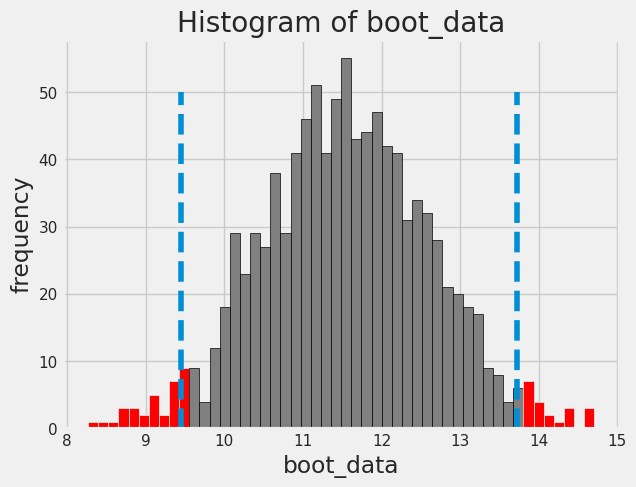

In [42]:
hsc_p_test = get_bootstrap(data[data.status == 1]["hsc_p"], data[data.status == 0]["hsc_p"])

In [43]:
print(f'P value for this test: {hsc_p_test["p_value"]}')

P value for this test: 2.9256774499908587e-27


In [44]:
data.hsc_b = data.hsc_b.map({'Central': 1, 'Others': 0})

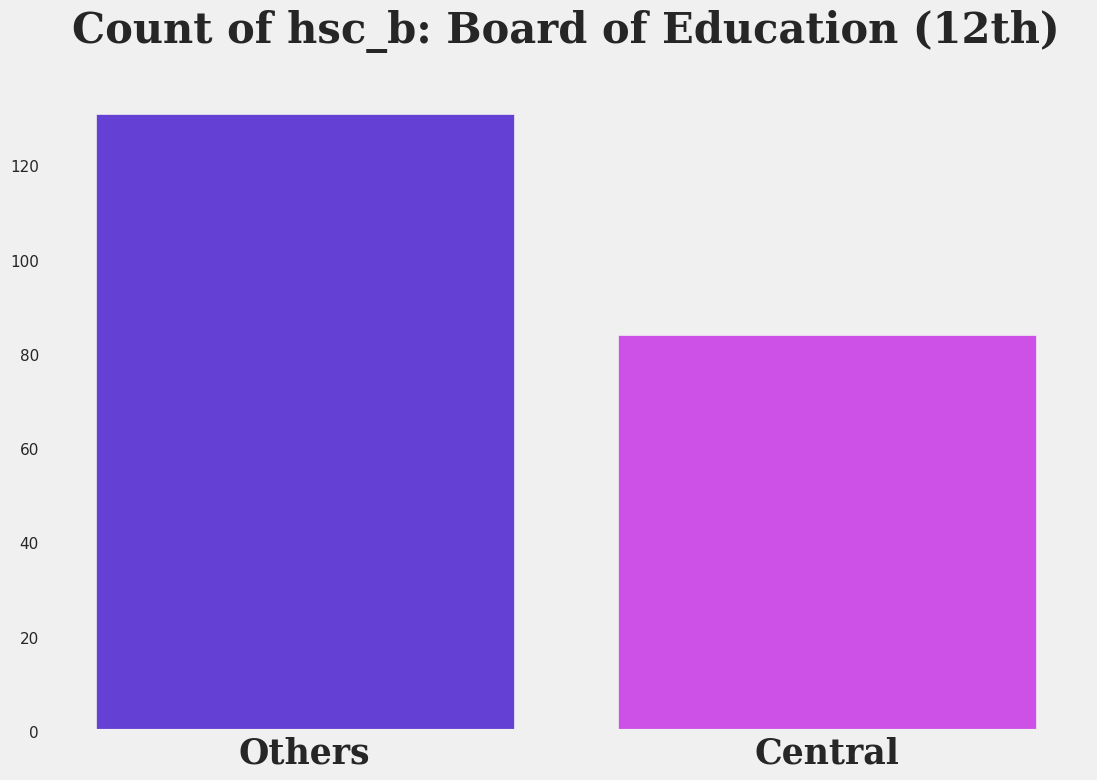

In [45]:
plt.figure(figsize=(12, 8))
ssc_b_plot = sns.countplot(x=data.hsc_b,
                            palette=two_colors[::-1])
ssc_b_plot.set_title('Count of hsc_b: Board of Education (12th)',
                      fontsize=30, y=1.05, **hfont)
ssc_b_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
ssc_b_plot.set_xticklabels(['Others', 'Central'], size=25, **hfont)
plt.show()

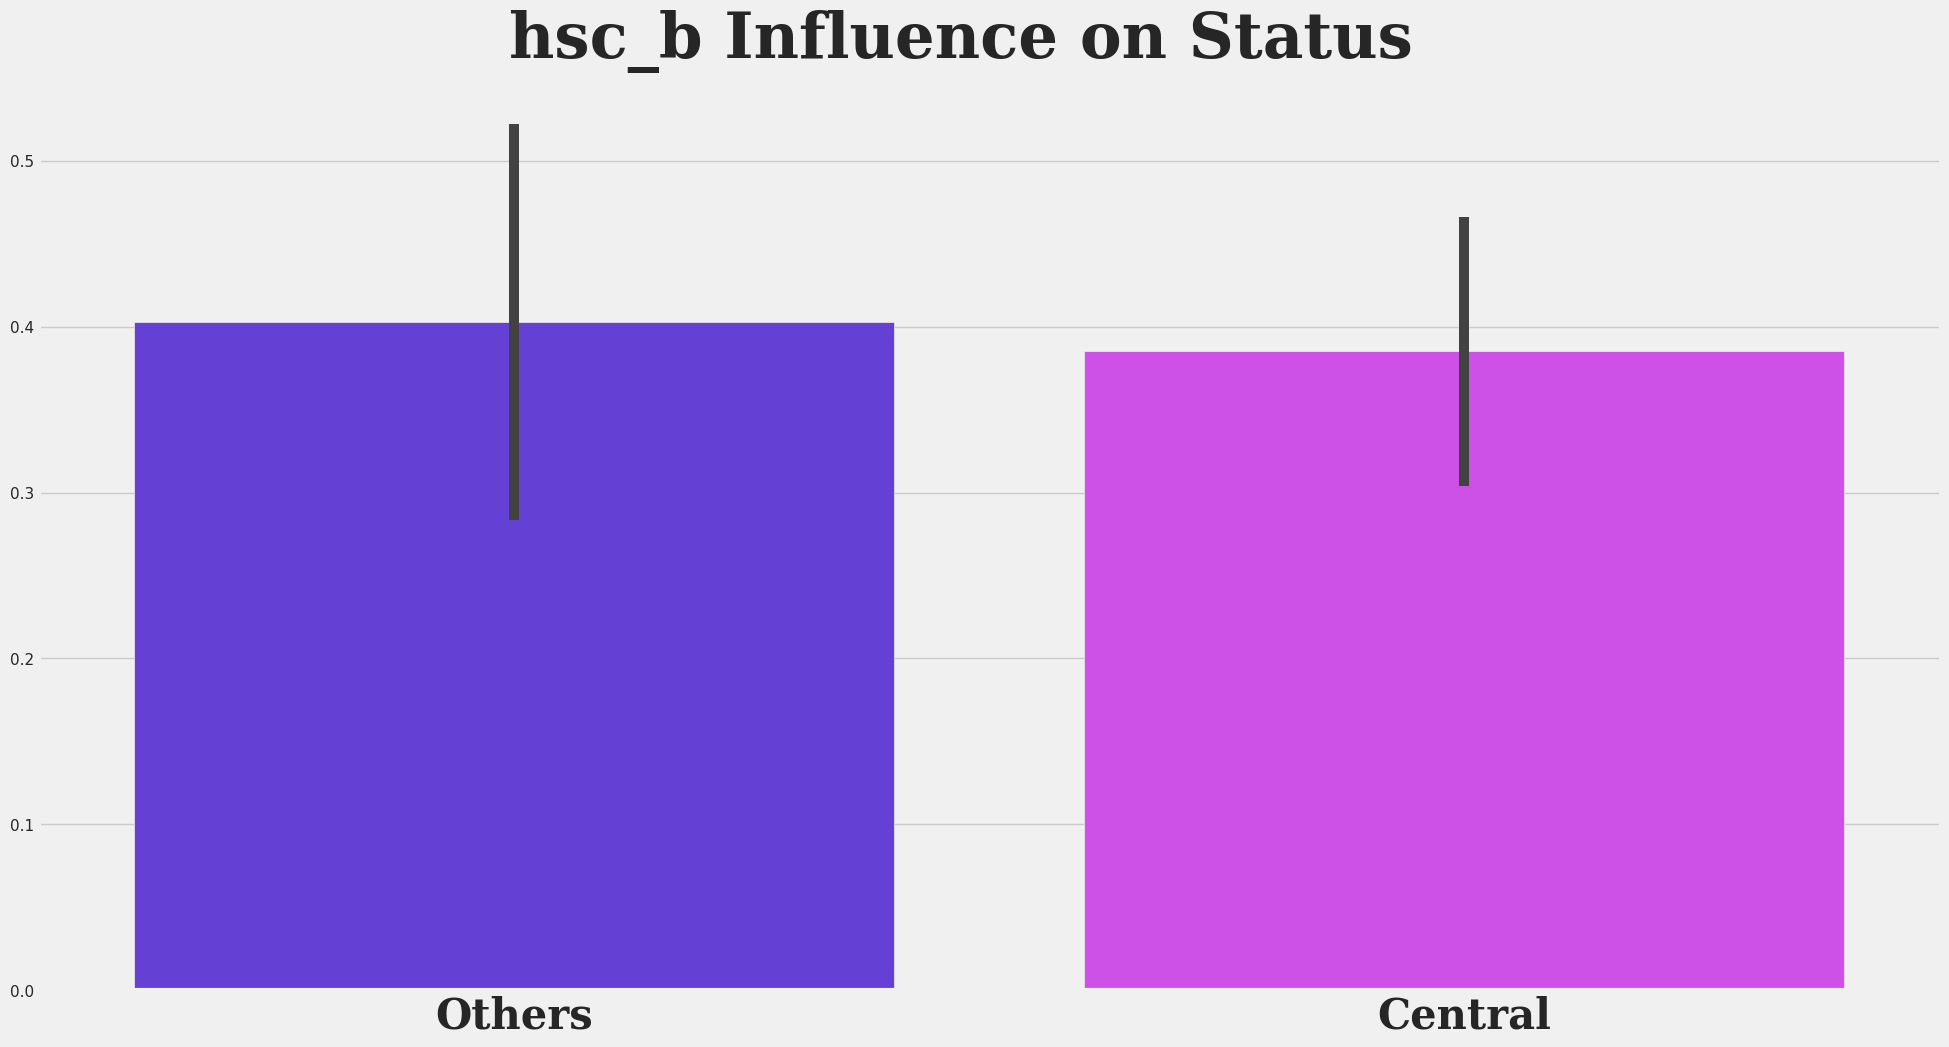

In [46]:
hsc_b_plot = sns.catplot(x='status', y='hsc_b', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
hsc_b_plot.set_xticklabels(['Others', 'Central'], size=30, **hfont)
hsc_b_plot.fig.suptitle('hsc_b Influence on Status',
                            size=45, y=1.05, **hfont)
hsc_b_plot.set(xlabel=None, ylabel=None)
plt.show()

In [47]:
data.hsc_s = data.hsc_s.map({'Commerce': 2, 'Science': 1, 'Arts': 0}) 

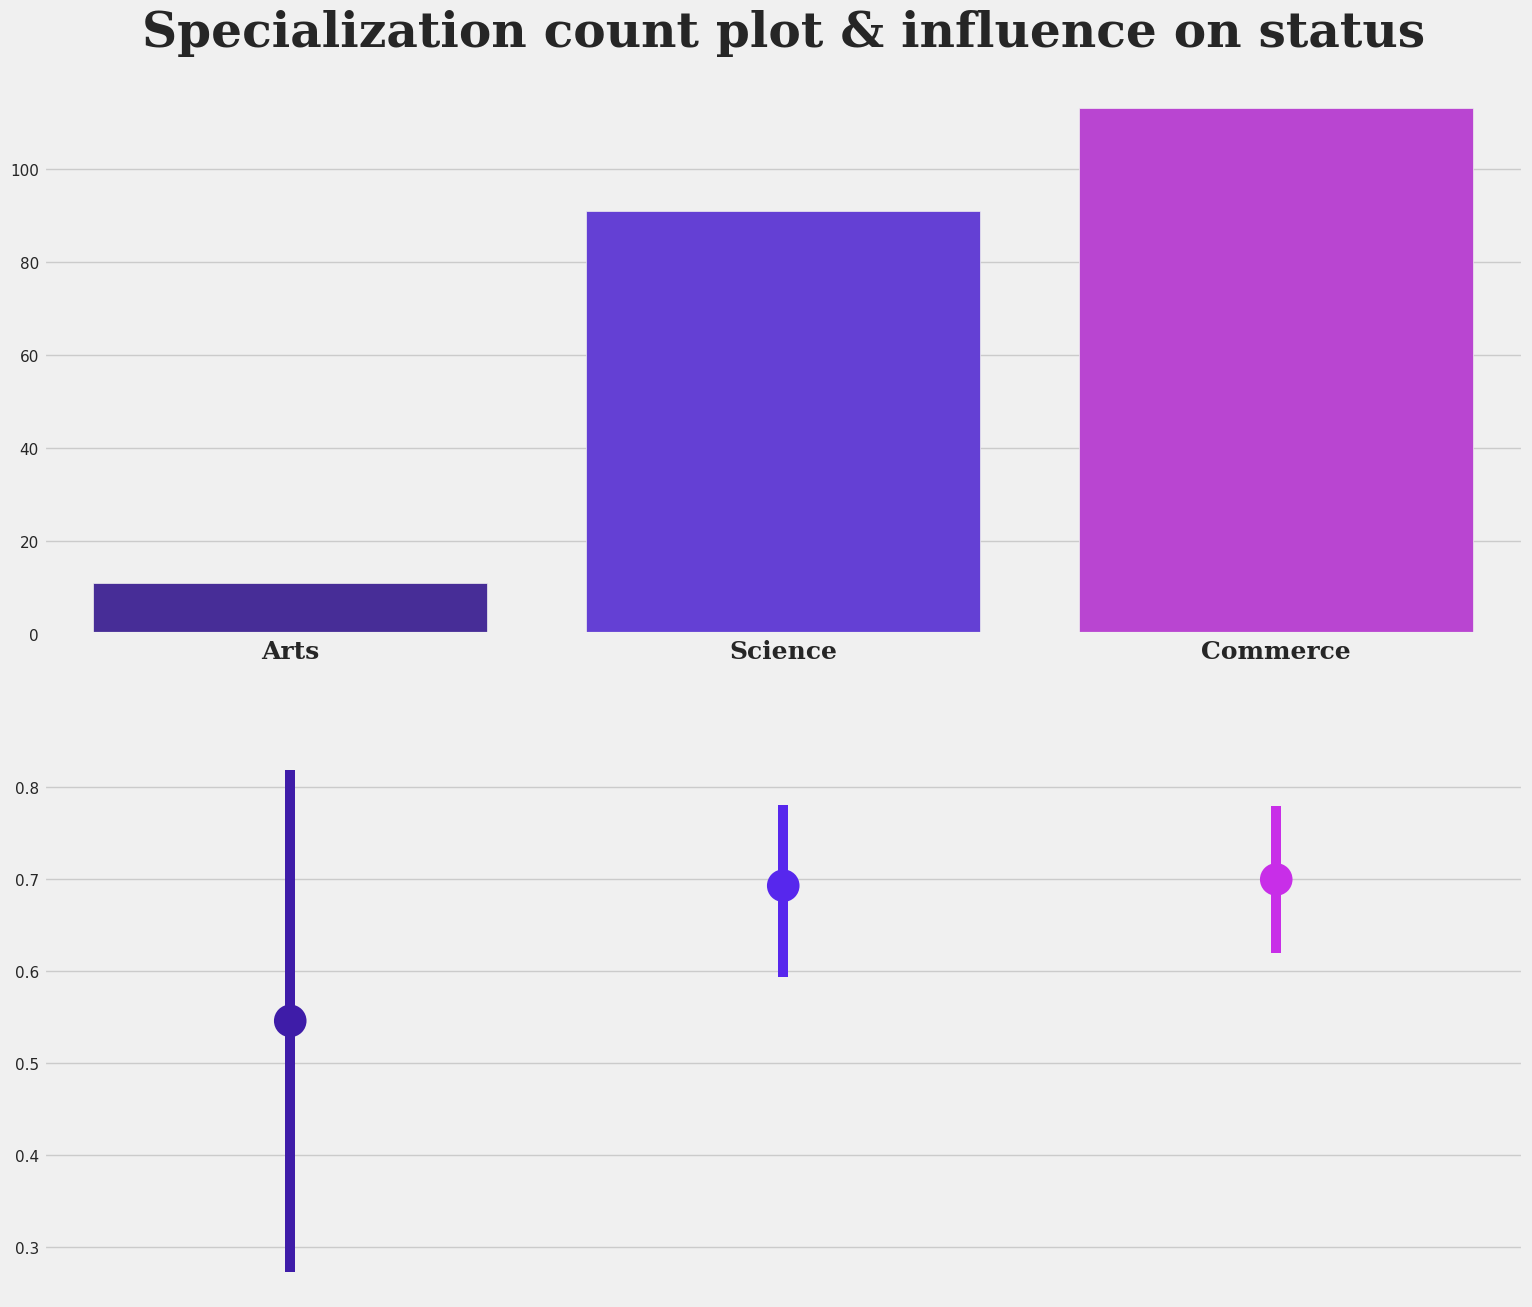

In [48]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
hsc_s_plot = sns.countplot(x=data.hsc_s, ax=ax1, palette=five_colors)
hsc_s_plot.set_title('Specialization count plot &'
                         ' influence on status',
                         fontsize=35, y=1.05, **hfont)
hsc_s_plot.set(xlabel=None,
                   ylabel=None)
hsc_s_plot.set_xticklabels(['Arts', 'Science', 'Commerce'],
                                size=18, **hfont)


ax2 = fig.add_subplot(grid[1, :])
hsc_s_cat = sns.pointplot(x=data.hsc_s, y='status', data=data,
             ax=ax2, palette=five_colors)
hsc_s_cat.set(xlabel=None,
                   ylabel=None)
hsc_s_cat.set_xticklabels([])
plt.show()

<ipython-input-49-33ba32bfd87e>:25: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-49-33ba32bfd87e>:27: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Placed mean:       68.74054054054054
Not Placed mean:   61.13417910447761


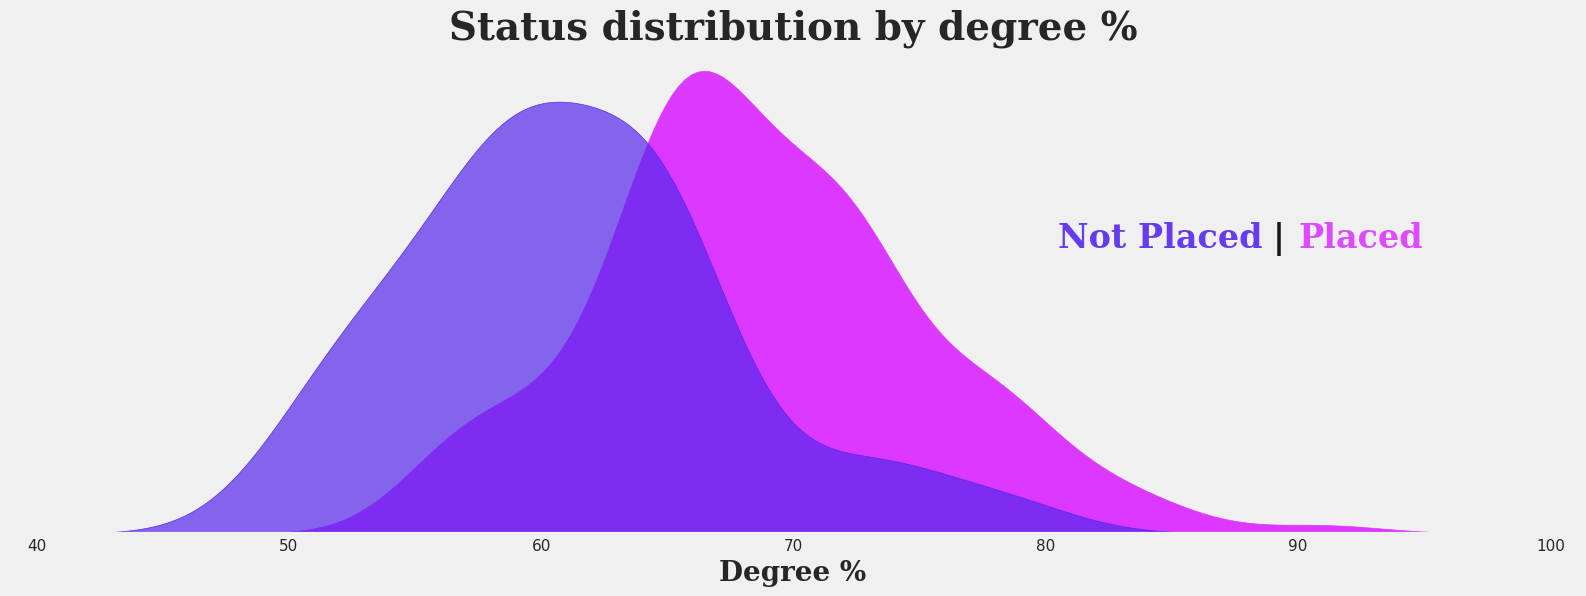

In [49]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title(f'Status distribution by degree %', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)

height = 0.04

ax.text(90, height, 'Placed', {'fontproperties': 'Serif',
                              'size': '24',
                              'weight': 'bold',
                              'color': two_colors[0]}, alpha=0.9)

ax.text(89, height, '|', {'fontproperties': 'Serif',
                         'size': '24',
                         'weight': 'bold',
                         'color': 'black'}, alpha=0.9)

ax.text(80.5, height, 'Not Placed', {'fontproperties': 'Serif',
                               'size': '24',
                               'weight': 'bold',
                               'color': two_colors[1]}, alpha=0.9)


sns.kdeplot(data.degree_p[data.status == 1], shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data.degree_p[data.status == 0], shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)

plt.xlabel('Degree %', size=20, **hfont)

print(f'Placed mean:       {data[data.status == 1]["degree_p"].mean()}')
print(f'Not Placed mean:   {data[data.status == 0]["degree_p"].mean()}')

In [50]:
placed_group = data[data.status == 1]['degree_p']
not_placed_group = data[data.status == 0]['degree_p']

t_test = stats.ttest_ind(placed_group, not_placed_group)
u_test = stats.mannwhitneyu(placed_group, not_placed_group)

In [51]:
print(f'Results of T-test                :   {t_test.pvalue}')
print(f'Results of U-test (Mann-whitneyu):   {u_test.pvalue}')

Results of T-test                :   8.807682138862608e-14
Results of U-test (Mann-whitneyu):   4.3024923797997455e-13


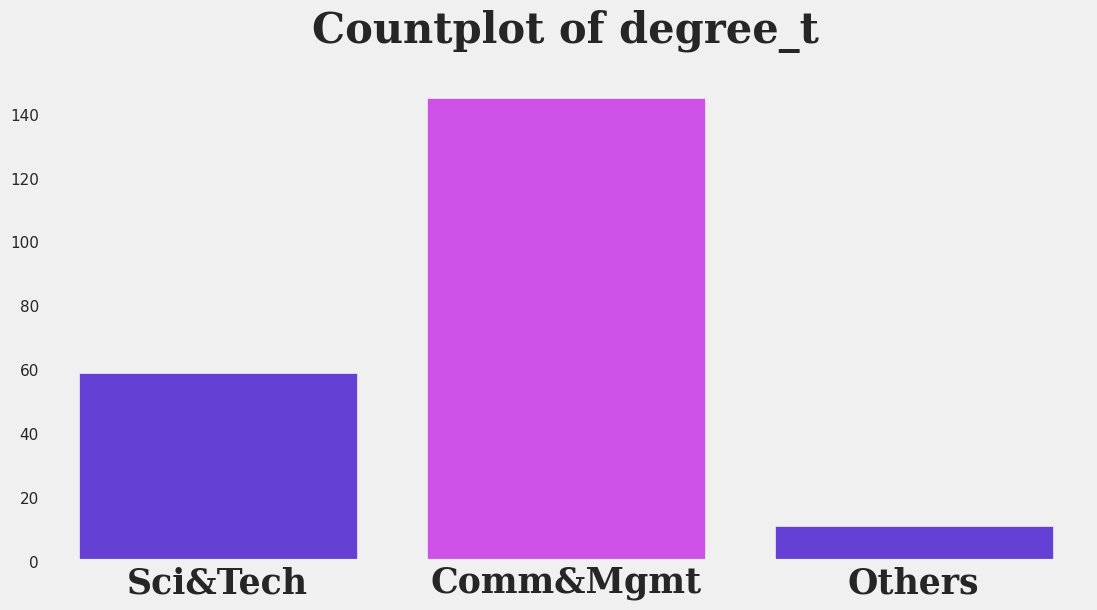

In [52]:
plt.figure(figsize=(12, 6))
degree_t_plot = sns.countplot(x=data.degree_t, palette=two_colors[::-1])
degree_t_plot.set_title('Countplot of degree_t',
                      fontsize=30, y=1.05, **hfont)
degree_t_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
degree_t_plot.set_xticklabels(data.degree_t.unique(), size=25, **hfont)
plt.show()

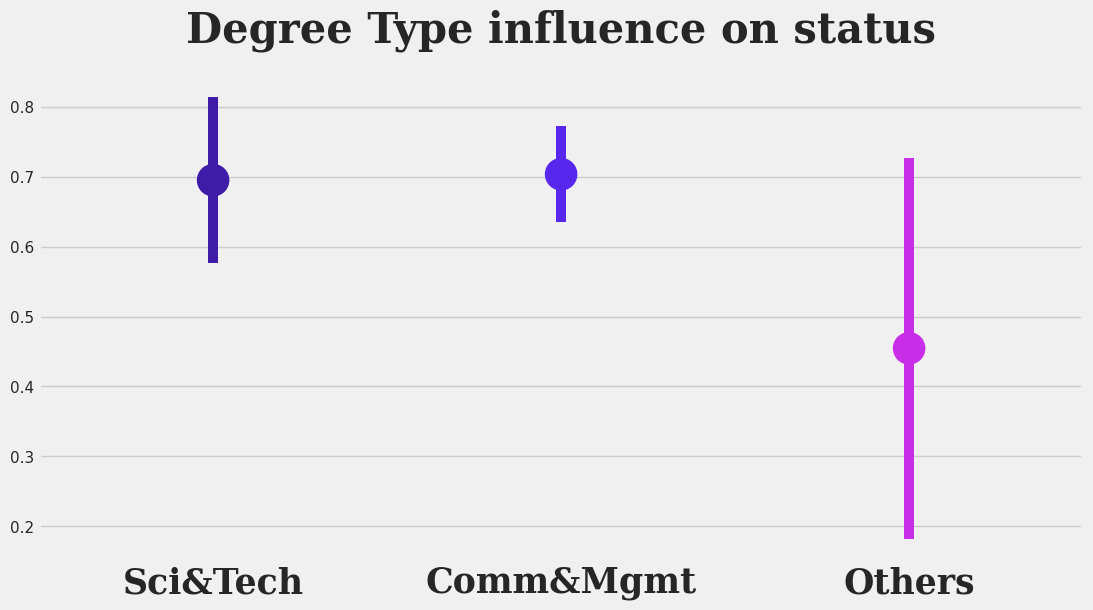

In [53]:
fig = plt.figure(figsize=(12, 6))

degree_type_plot = sns.pointplot(x=data.degree_t, y='status', data=data, palette=five_colors)

degree_type_plot.set_title('Degree Type influence on status', fontsize=30, y=1.05, **hfont)
degree_type_plot.set(xlabel=None,
                     ylabel=None)
degree_type_plot.set_xticklabels(data.degree_t.unique(), size=25, **hfont)
plt.show()

In [54]:
data.degree_t.unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [55]:
data.degree_t.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [56]:
data.degree_t = data.degree_t.map({'Sci&Tech': 1, 'Comm&Mgmt': 2, 'Others': 3}) 

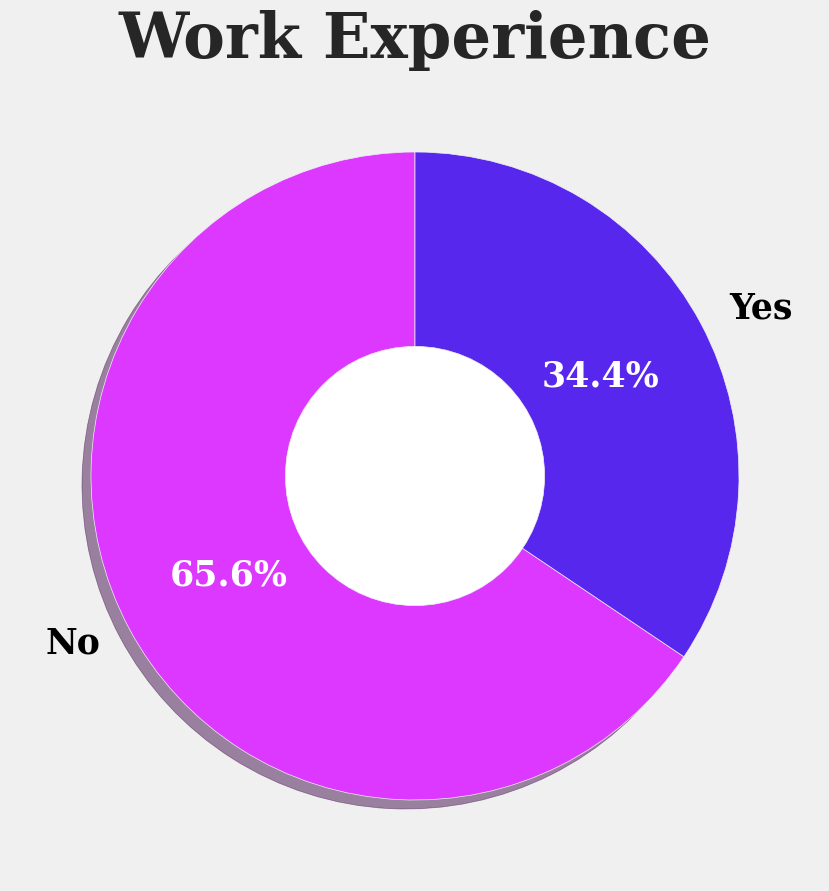

In [57]:
workex_data = data.workex.value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(workex_data,
                               labels=workex_data.index,
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Work Experience', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

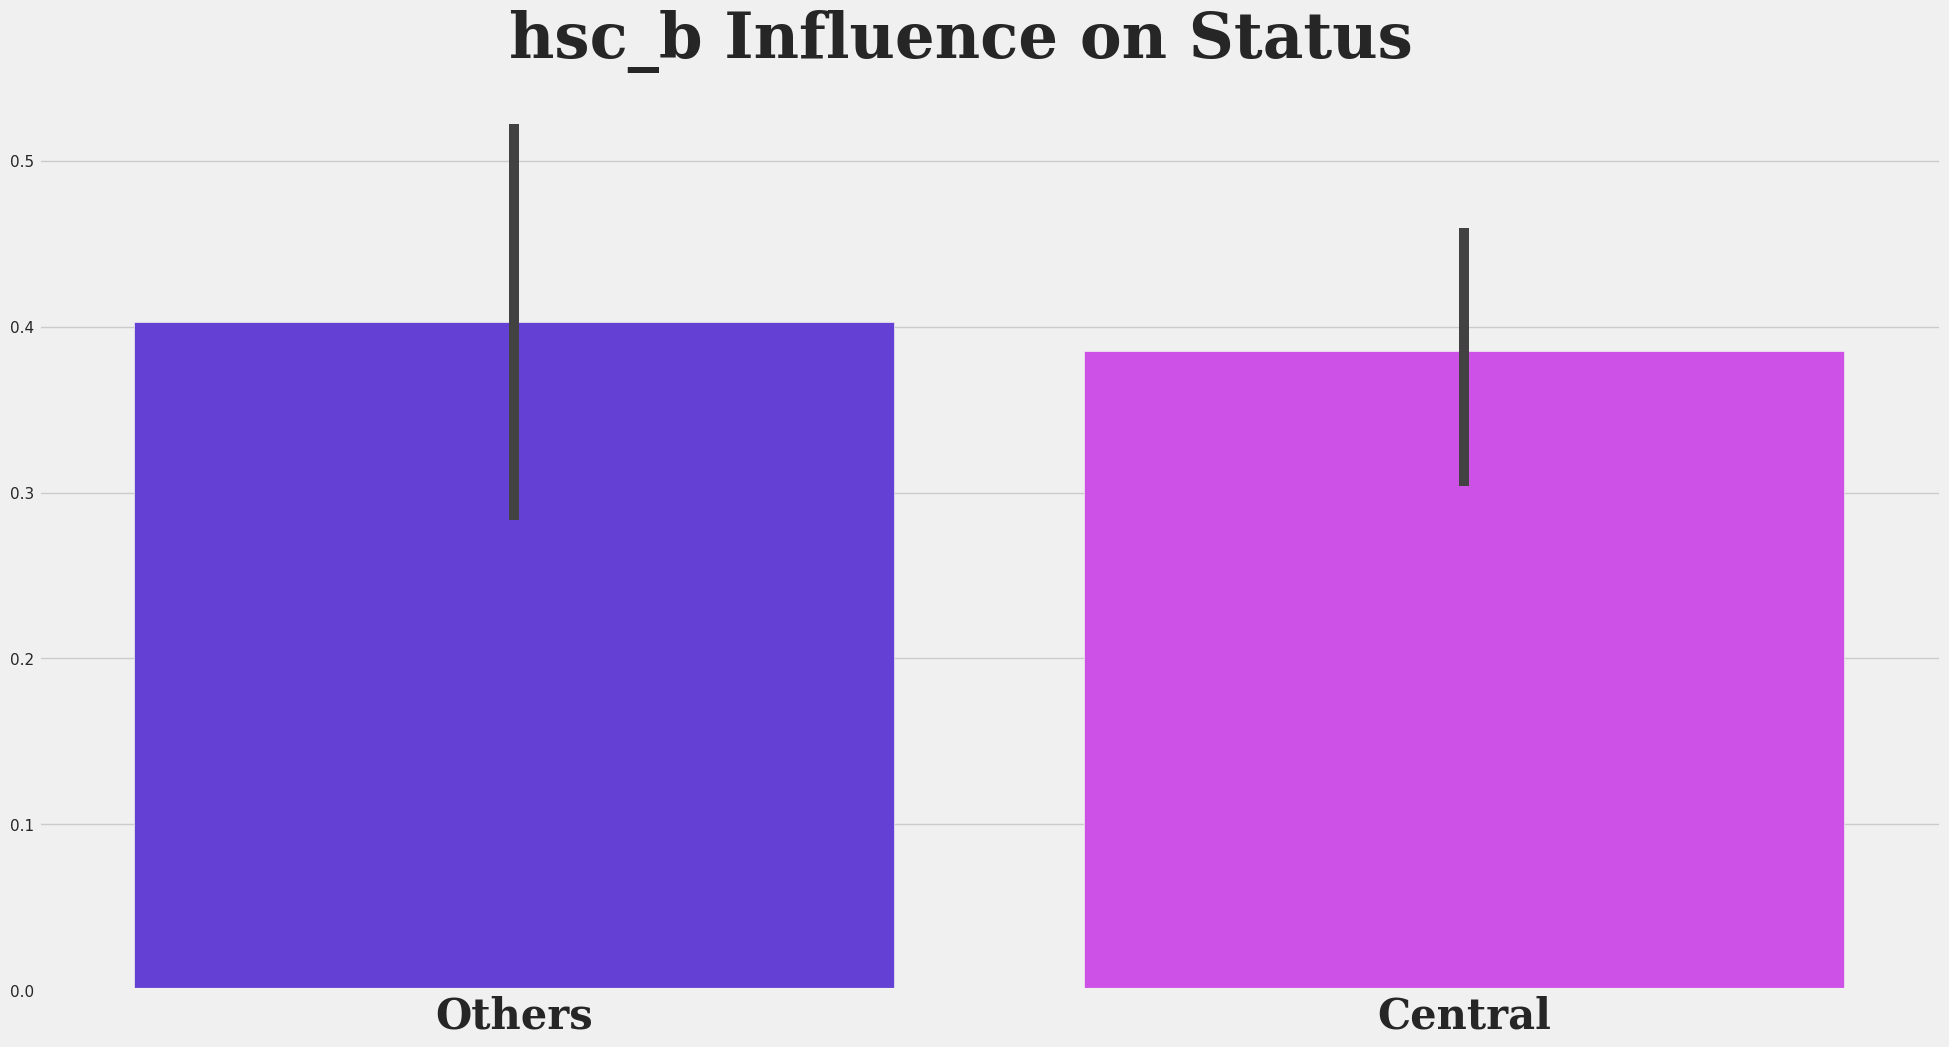

In [58]:
workex_plot = sns.catplot(x='status', y='hsc_b', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
workex_plot.set_xticklabels(['Others', 'Central'], size=30, **hfont)
workex_plot.fig.suptitle('hsc_b Influence on Status', size=45, y=1.05, **hfont)
workex_plot.set(xlabel=None, ylabel=None)
plt.show()

In [59]:
data.workex = data.workex.map({'No': 0, 'Yes': 1})

<ipython-input-60-1fd96071e56e>:25: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-60-1fd96071e56e>:27: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




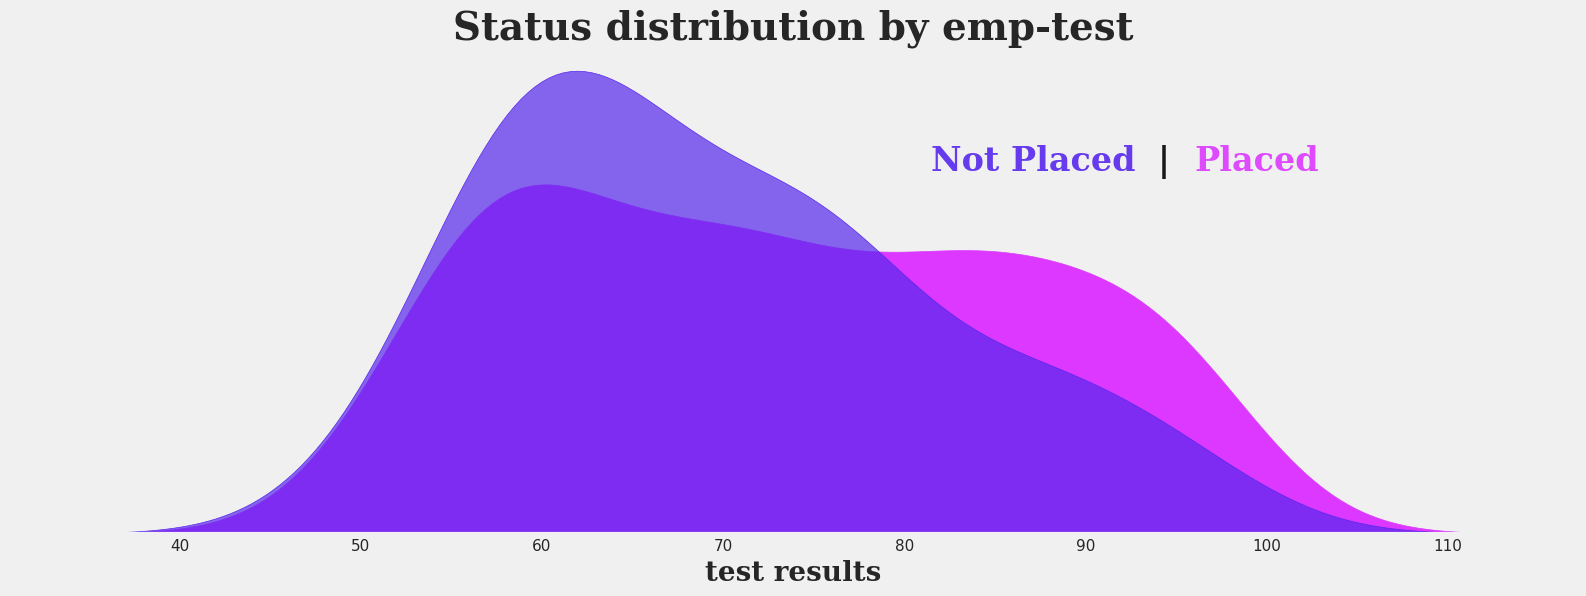

In [60]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title(f'Status distribution by emp-test', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)

height = 0.025

ax.text(96, height, 'Placed', {'fontproperties': 'Serif',
                               'size': '24',
                               'weight': 'bold',
                               'color': two_colors[0]}, alpha=0.9)

ax.text(94, height, '|', {'fontproperties': 'Serif',
                          'size': '24',
                          'weight': 'bold',
                          'color': 'black'}, alpha=0.9)

ax.text(81.5, height, 'Not Placed', {'fontproperties': 'Serif',
                                     'size': '24',
                                     'weight': 'bold',
                                     'color': two_colors[1]}, alpha=0.9)


sns.kdeplot(data.etest_p[data.status == 1], shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data.etest_p[data.status == 0], shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)

plt.xlabel('test results', size=20, **hfont)
plt.show()

In [61]:
data.status.unique()

array([1, 0])

In [62]:
data.status.value_counts()

1    148
0     67
Name: status, dtype: int64

In [63]:
placed_group = data[data.status == 1]['etest_p']
not_placed_group = data[data.status == 0]['etest_p']

placed_group_for_wil = np.random.choice(placed_group, len(not_placed_group))

t_test = stats.ttest_ind(placed_group, not_placed_group)
u_test = stats.mannwhitneyu(placed_group, not_placed_group)

# If variance is different for b/w the groups
wilcoxon = stats.wilcoxon(placed_group_for_wil, not_placed_group)

print(f'P-value (alpha = 0.05)')
print('-'*7)
print(f'T-test  : {t_test.pvalue:.5f}')
print(f'U-test  : {u_test.pvalue:.5f}')
print(f'Wilcoxon: {wilcoxon.pvalue:.5f}')

P-value (alpha = 0.05)
-------
T-test  : 0.06172
U-test  : 0.09555
Wilcoxon: 0.00202


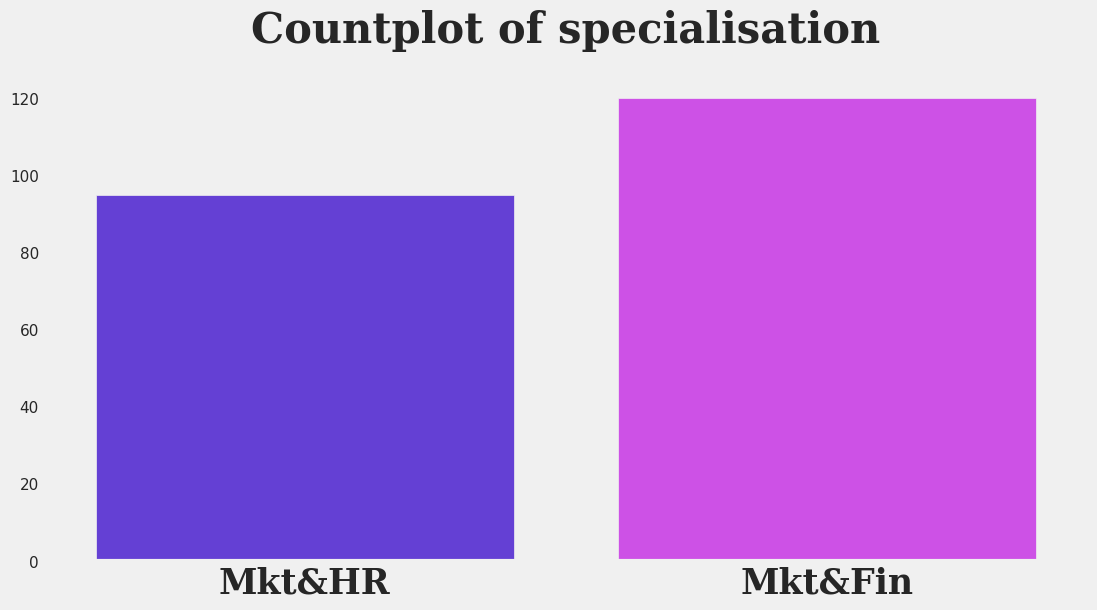

In [64]:
plt.figure(figsize=(12, 6))
specialisation_plot = sns.countplot(x=data.specialisation, palette=two_colors[::-1])
specialisation_plot.set_title('Countplot of specialisation',
                      fontsize=30, y=1.05, **hfont)
specialisation_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
specialisation_plot.set_xticklabels(data.specialisation.unique(), size=25, **hfont)
plt.show()

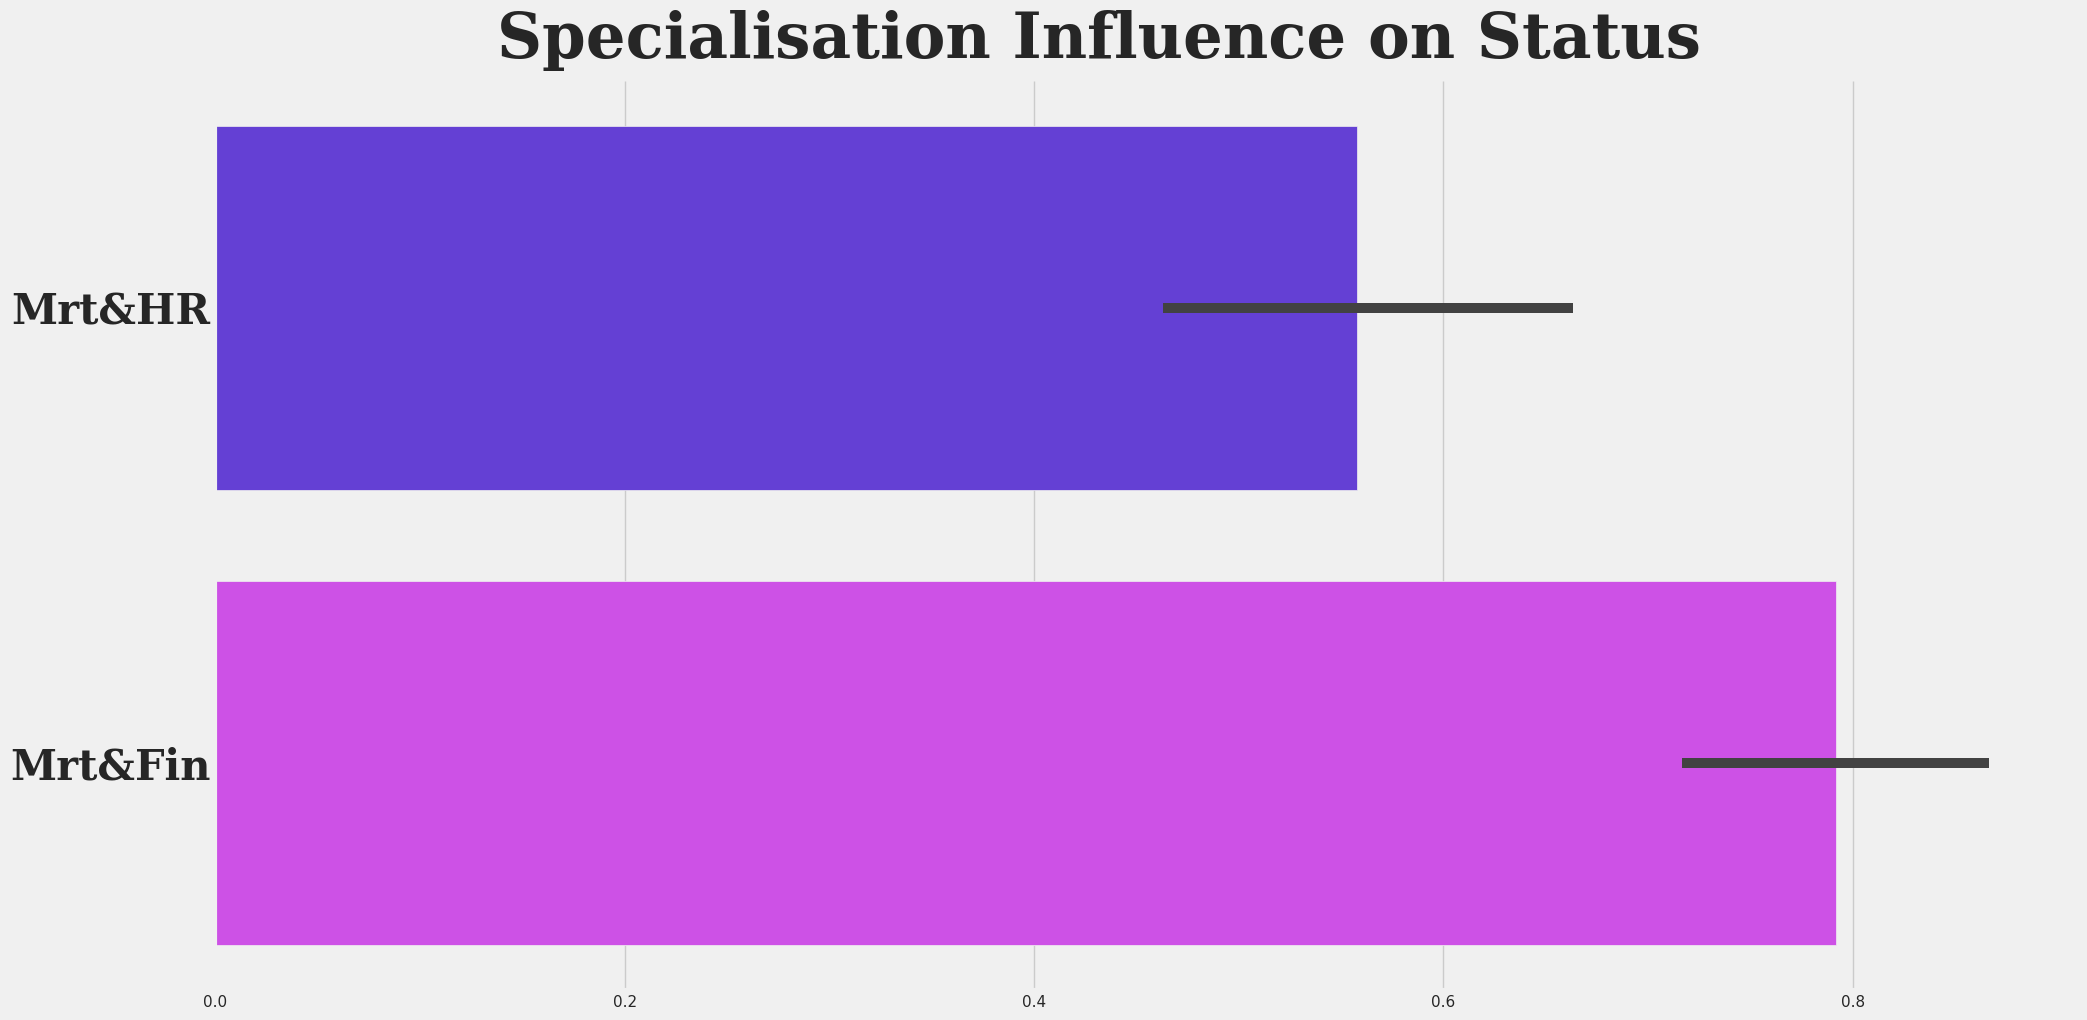

In [65]:
spec_catplot = sns.catplot(x='status', y='specialisation', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
spec_catplot.set_yticklabels(['Mrt&HR', 'Mrt&Fin'], size=30, **hfont)
spec_catplot.fig.suptitle('Specialisation Influence on Status', size=45, y=1.05, **hfont)
spec_catplot.set(xlabel=None, ylabel=None)
plt.show()

In [66]:
data.specialisation = data.specialisation.map({'Mkt&Fin': 1, 'Mkt&HR': 0})

<ipython-input-67-8fde8a7d3cc1>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-67-8fde8a7d3cc1>:22: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




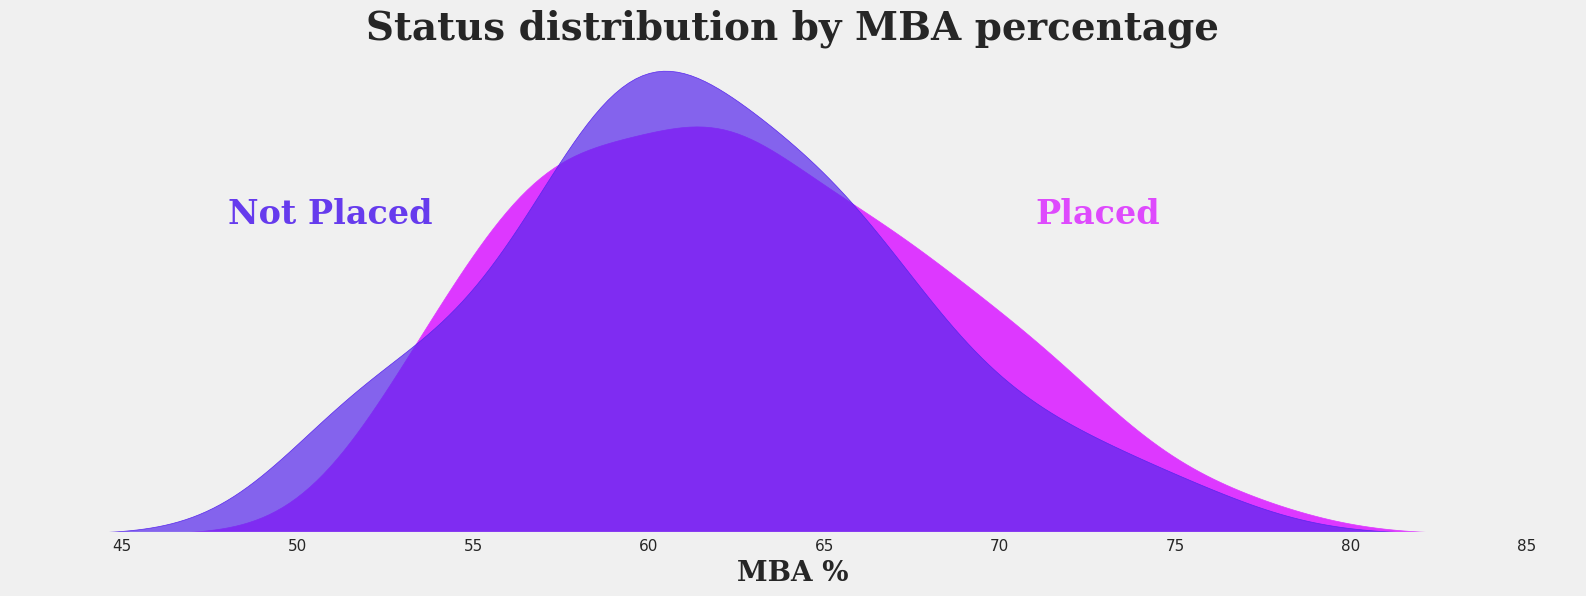

In [67]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title(f'Status distribution by MBA percentage', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)

height = 0.045

ax.text(71, height, 'Placed', {'fontproperties': 'Serif',
                               'size': '24',
                               'weight': 'bold',
                               'color': two_colors[0]}, alpha=0.9)

ax.text(48, height, 'Not Placed', {'fontproperties': 'Serif',
                                     'size': '24',
                                     'weight': 'bold',
                                     'color': two_colors[1]}, alpha=0.9)


sns.kdeplot(data.mba_p[data.status == 1], shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data.mba_p[data.status == 0], shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)

plt.xlabel('MBA %', size=20, **hfont)
plt.show()

In [68]:
placed_group = data[data.status == 1]['mba_p']
not_placed_group = data[data.status == 0]['mba_p']

placed_group_for_wil = np.random.choice(placed_group, len(not_placed_group))

t_test = stats.ttest_ind(placed_group, not_placed_group)
u_test = stats.mannwhitneyu(placed_group, not_placed_group)

print(f'P-value (alpha = 0.05)')
print('-'*7)
print(f'T-test  : {t_test.pvalue:.5f}')
print(f'U-test  : {u_test.pvalue:.5f}')

P-value (alpha = 0.05)
-------
T-test  : 0.26145
U-test  : 0.35471


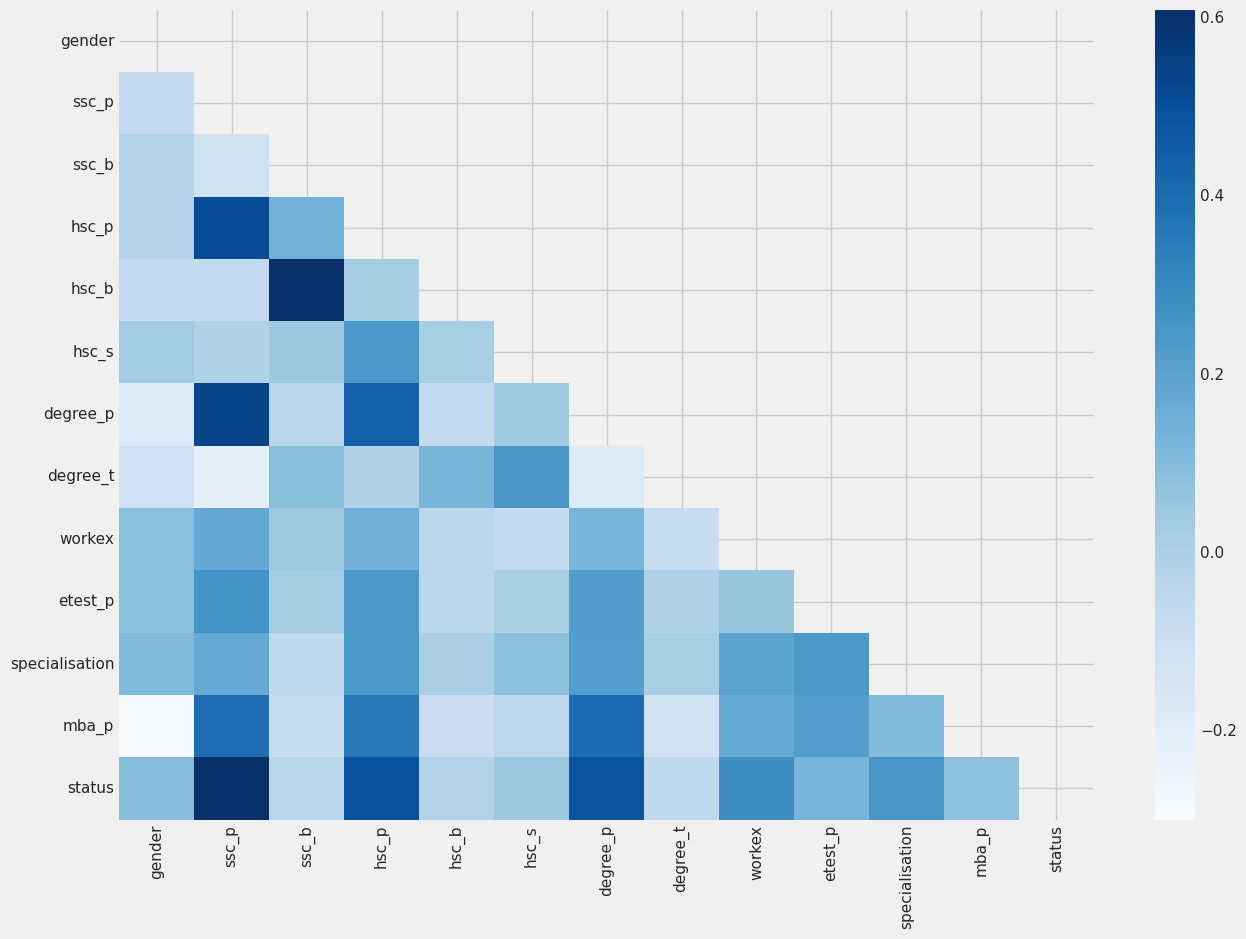

In [69]:
plt.figure(figsize=(14, 10))

corr_mask = np.triu(data.corr())
h_map = sns.heatmap(data.corr(), mask=corr_mask, cmap='Blues')
h_map
plt.show()

In [70]:
X = data.drop(['status'], axis=1)
y = data.status

print(X.shape, y.shape)

(215, 12) (215,)


In [71]:
X = X.drop(columns=['etest_p'])

In [72]:
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score

models_results = [0]*5

def show_training_results(X, y, model_name, model, split_share=0.3, **kwargs):

    print(f'The model {model_name} with parameters : {kwargs}')
    m = model(**kwargs)

    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=split_share, random_state=rnd_state)

    m.fit(X_train, y_train)

    score = m.score(X_test, y_test)

    prediction = m.predict(X_test)
    pred_proba = m.predict_proba(X_test)

    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    F1 = f1_score(y_test, prediction)
    roc = roc_auc_score(y_test, pred_proba[:,1])

    all_metrics = np.array([score, precision, recall, F1, roc])

    print('-'*32)
    print(f'Score          ========>>> {score:.{3}f}')
    print()
    print(f'Precision      ========>>> {precision:.{3}f}')
    print()
    print(f'Recall         ========>>> {recall:.{3}f}')
    print()
    print(f'F1             ========>>> {F1:.{3}f}')
    print()
    print(f'ROC-AUC        ========>>> {roc:.{3}f}')

    plot_conf_mat(m, X_test, y_test)

    return all_metrics


def plot_conf_mat(model, X_test, y_test):

    y_pred = model.predict(X_test)

    pred_matrix = confusion_matrix(y_test, y_pred, normalize='true') * 100
    actual_matrix = confusion_matrix(y_test, y_pred, normalize='pred') * 100

    df_cm_true = pd.DataFrame(actual_matrix, index = ["Don't", 'Placed'],
                                columns = ["Don't", 'Placed'])
    
    df_cm_pred = pd.DataFrame(pred_matrix, index = ["Don't", 'Placed'],
                                columns = ["Don't", 'Placed'])

    fig, axis = plt.subplots(figsize=(16, 6), ncols=2)
    
    # Actual Values plot

    sns.heatmap(df_cm_true,
                annot=True,
                cmap='Blues',
                fmt='.5g',
                ax=axis[0],
                annot_kws={"size": 20}).set_title('By Actual Values', fontsize = 20, **hfont)
    axis[0].set_xlabel('Actual values', fontsize = 15, **hfont)
    axis[0].set_ylabel('Predicted values', fontsize = 15, **hfont)

    # Prediction's Values plot

    pred_plot = sns.heatmap(df_cm_pred,
                annot=True,
                cmap='Blues',
                fmt='.5g',
                ax=axis[1],
                annot_kws={"size": 20}).set_title('By Predicted Values', fontsize = 20, **hfont)
    axis[1].set_xlabel('Actual values', fontsize = 15, **hfont)
    axis[1].set_ylabel('Predicted values', fontsize = 15, **hfont)

    fig.subplots_adjust(top=0.8)
    fig.suptitle('Normilized Confusion Matrix in %', size=30, **hfont)

    plt.show()

The model LogReg with parameters : {'max_iter': 5000, 'random_state': 0}
--------------------------------
Score          ========>>> 0.846

Precision      ========>>> 0.875

Recall         ========>>> 0.913

F1             ========>>> 0.894

ROC-AUC        ========>>> 0.931


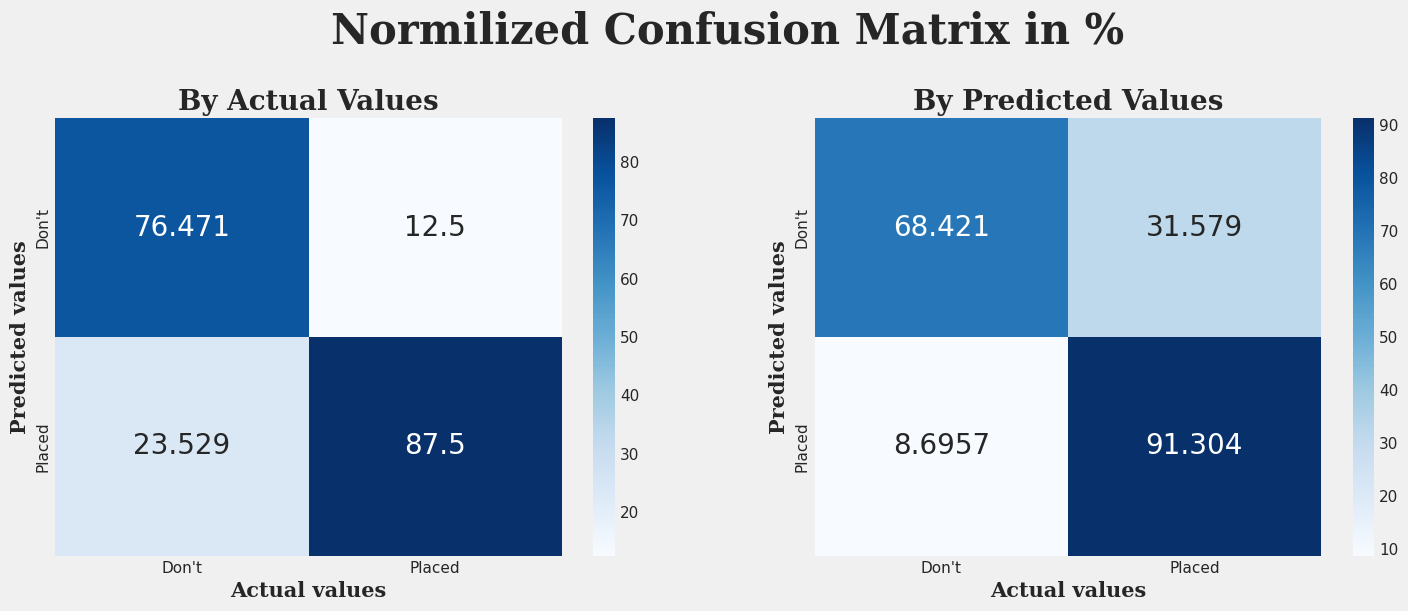

In [73]:
rnd_state = 0

models_results[0] =   show_training_results(X, y,
                      'LogReg',
                      LogisticRegression,
                      max_iter=5000,
                      random_state=rnd_state)

The model RF with parameters : {}
--------------------------------
Score          ========>>> 0.815

Precision      ========>>> 0.840

Recall         ========>>> 0.913

F1             ========>>> 0.875

ROC-AUC        ========>>> 0.912


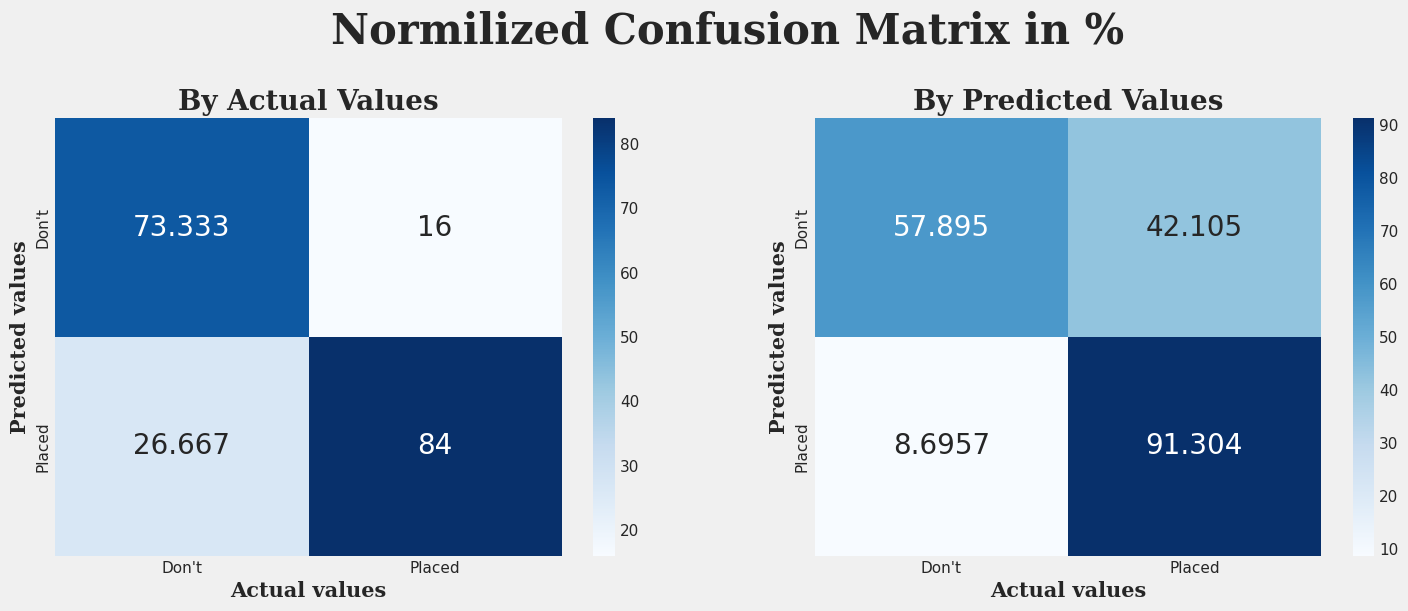

In [74]:
models_results[1] =   show_training_results(X, y,
                      'RF',
                      RandomForestClassifier)

The model AdaBoostClassifier with parameters : {}
--------------------------------
Score          ========>>> 0.831

Precision      ========>>> 0.843

Recall         ========>>> 0.935

F1             ========>>> 0.887

ROC-AUC        ========>>> 0.932


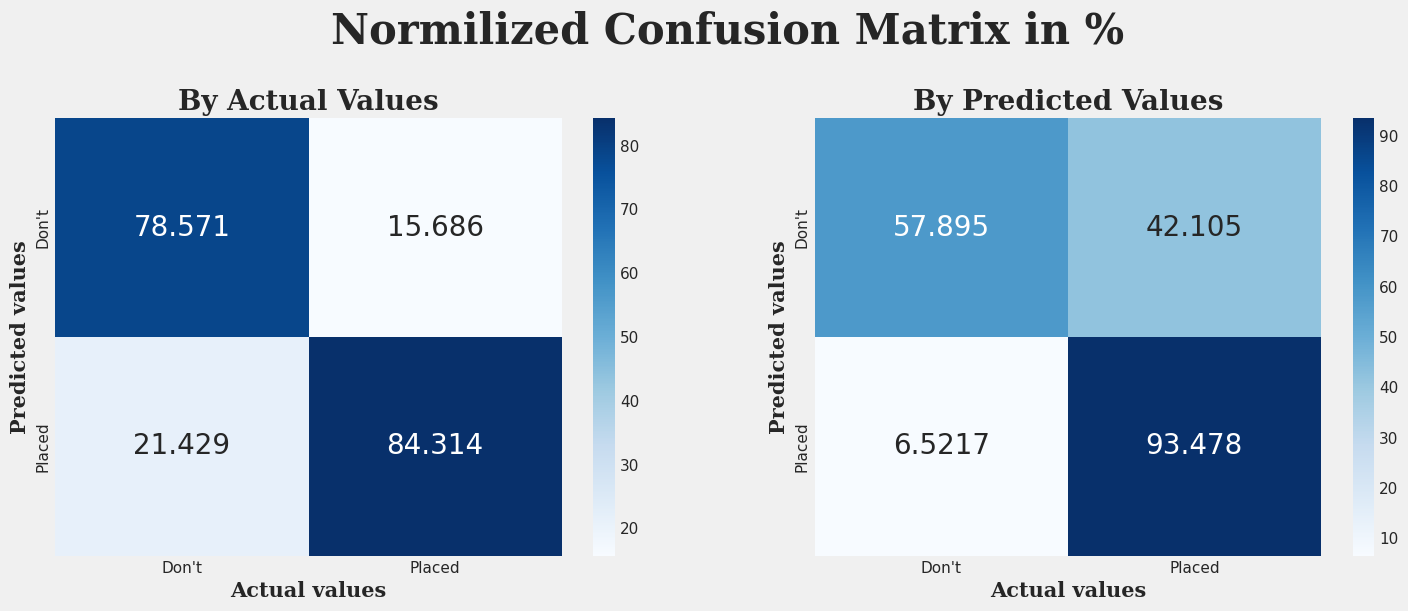

In [75]:
models_results[2] =   show_training_results(X, y,
                      'AdaBoostClassifier',
                      AdaBoostClassifier)

The model GradientBoostingClassifier with parameters : {}
--------------------------------
Score          ========>>> 0.846

Precision      ========>>> 0.875

Recall         ========>>> 0.913

F1             ========>>> 0.894

ROC-AUC        ========>>> 0.874


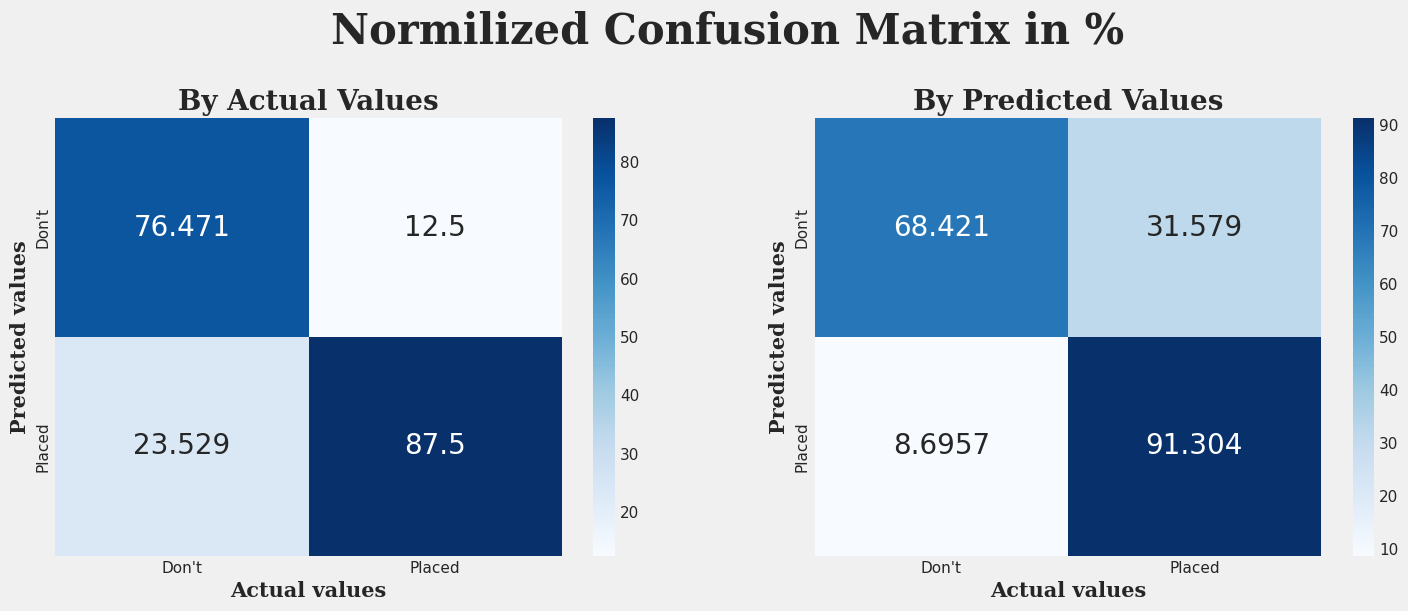

In [76]:
models_results[3] =   show_training_results(X, y,
                      'GradientBoostingClassifier',
                      GradientBoostingClassifier)

In [77]:
os.environ["KMP_SETTINGS"] = "false" # to avoid a huge warning about sort of settings

In [78]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [79]:
def neural_net_results(X, y):

    K.set_session(42)

    y = keras.utils.to_categorical(y, 2)

    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.25,
                                                      random_state=rnd_state)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = keras.Sequential([
        keras.layers.Flatten(input_dim=X_train.shape[1]),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(36, activation='relu'),
        keras.layers.Dense(36, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=[f1_m, precision_m, recall_m])

    history = model.fit(X_train, y_train,
              batch_size=100, epochs=150,
              validation_data=(X_val, y_val),
              verbose=0)

    score = loss, f1_score, precision, recall = model.evaluate(X_val, y_val, verbose=0)
    print(f'Neural Network score results    ========>>> {score}')

    history_plot(history)

    return score


def history_plot(history):

    fig = plt.figure(figsize=(12, 8))
    plt.title('Loss of ANN', size=35, **hfont)
    plt.plot(history.history['loss'], label="Train loss")
    plt.plot(history.history['val_loss'], label="Test loss")
    plt.legend()


def plot_nn_model(model):
    plot_model(model, show_shapes=True)

Neural Network score results    ========>>> [0.39073580503463745, 0.8451703786849976, 0.8451704978942871, 0.8451704978942871]


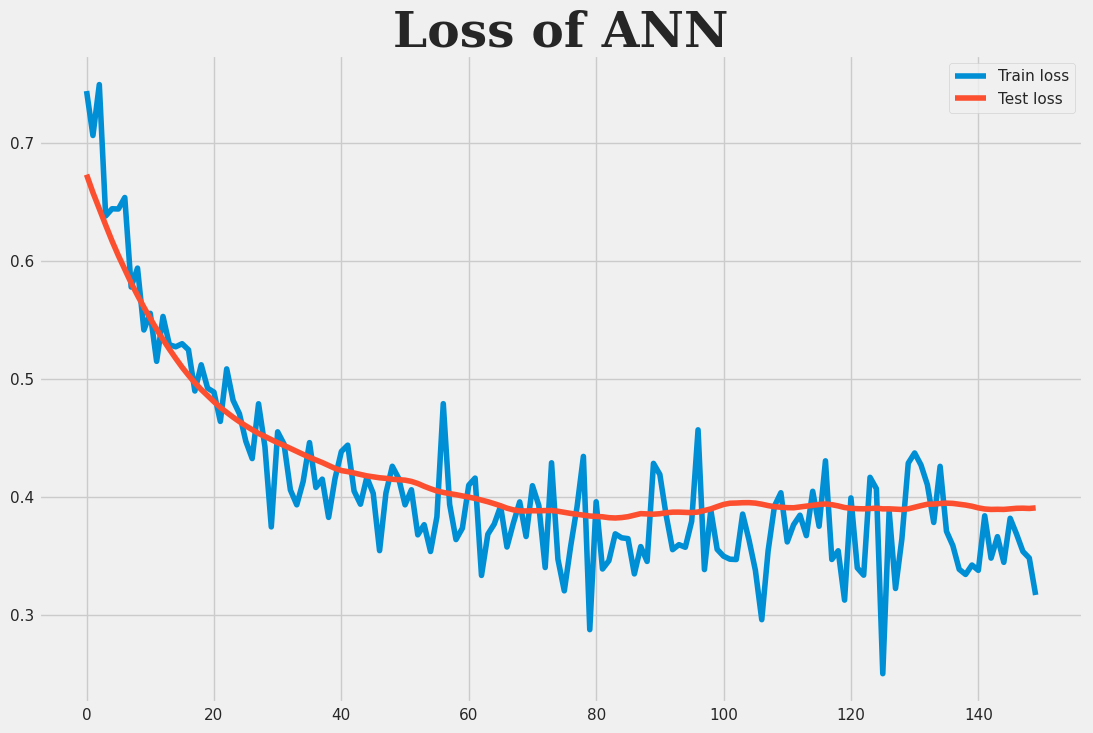

In [80]:
models_results[-1] = neural_net_results(X, y)